# Welcome to SImulation of SEctoral Pathways with Uncertainty Exploration for DEcarbonization (SISEPUEDE)

SISEPUEDE is yada yada...


In [1]:
## load packages
import logging
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import temp as tmp
import sisepuede as ssp
import sqlalchemy
import sql_utilities as sqlutil
import support_functions as sf
from typing import *
import warnings
warnings.filterwarnings("ignore")

##
def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_sisepuede.log"))

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py:2244: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")


<Logger __main__ (DEBUG)>

##  Initialize the SISEPUEDE class to get started running some models
- see ``?SISEPUEDE`` for more information on initialization arguments

In [2]:
regions =[
    "argentina",
    #"bahamas",
    #"barbados" - missing in latest?,
    #"belize",
    #"bolivia",
    "brazil",
    "chile",
    "colombia",
    "costa_rica",
    #"dominican_republic",
    "ecuador",
    "el_salvador",
    "guatemala",
    #"guyana",
    #"haiti",
    "honduras",
    "jamaica",
    "mexico",
    "nicaragua",
    "panama",
    "paraguay",
    "peru",
    #"suriname",
    #"trinidad_and_tobago",
    "uruguay",
    #"venezuela"
]


In [21]:
sisepuede = ssp.SISEPUEDE(
    "calibrated", 
    #id_str = "sisepuede_run_2023-04-11T01:08:41.002227",
    logger = logger,
    regions = ["india"]#["brazil", "chile", "ecuador", "mexico"]
)

#id_str = "sisepuede_run_2023-02-28T20:47:55.917752",

2023-04-27 00:16:07,480 - INFO - Successfully initialized SISEPUEDEFileStructure.
2023-04-27 00:16:07,481 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2023-04-27 00:16:07,482 - INFO - 	Setting export engine to 'sqlite'.
2023-04-27 00:16:07,484 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2023-04-27 00:16:07,485 - INFO - Successfully instantiated table ANALYSIS_METADATA
2023-04-27 00:16:07,487 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2023-04-27 00:16:07,487 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2023-04-27 00:16:07,489 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2023-04-27 00:16:07,490 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2023-04-27 00:16:07,491 - WARNING - No index

## Call the .project_scenarios() method to write outputs directly to a database (prevents significant memory usage)
- This method returns a list of primary keys that were successfully run
- The first positional argument, ``primary_keys``, can be a list of primary keys *or* a dictionary of scenario dimensions
    - e.g., ``sisepuede.project_scenarios([0, 5, 1989])`` uses 3 primary keys
    - ``sisepuede.project_scenarios({"strategy_id": [0], "future_id": [0, 9, 903]})`` specifies a scenario dimensional subset of primary keys
- see ``?sisepuede.project_scenarios`` for more information on inputs



In [ ]:
strats_run = [0] + list(range(3001, 3044))

# transport only
#strats_run = [0] + list(range(3018, 3035))
#strats_run += list(range(3040, 3044))

dict_filt = {
    "future_id": [0],
    "design_id": [0], 
    "strategy_id": strats_run
}

if True:
    dict_primary_keys_out = sisepuede.project_scenarios(
        dict_filt,
        chunk_size = 2
    )

2023-04-27 00:28:00,821 - INFO - 
***	STARTING REGION india	***

2023-04-27 00:28:01,286 - INFO - Trying run primary_id = 5005 in region india
2023-04-27 00:28:01,287 - INFO - Running AFOLU model
2023-04-27 00:28:01,616 - INFO - AFOLU model run successfully completed
2023-04-27 00:28:01,617 - INFO - Running CircularEconomy model
2023-04-27 00:28:01,730 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:28:01,731 - INFO - Running IPPU model
2023-04-27 00:28:01,902 - INFO - IPPU model run successfully completed
2023-04-27 00:28:01,902 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:28:01,942 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:28:02,162 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:28:02,163 - INFO - Running Energy model (Electricity: trying to call Julia)


Set parameter TimeLimit to value 900
2023-27-Apr 00:28:04.142 Started modeling scenario.
2023-27-Apr 00:28:56.166 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-04-27 00:28:56,506 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:28:56,528 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:28:56,611 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:28:56,613 - INFO - Model run for primary_id = 5005 successfully completed in 55.33 seconds.
2023-04-27 00:28:56,617 - INFO - Trying run primary_id = 6006 in region india
2023-04-27 00:28:56,617 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-04-27 00:28:56,943 - INFO - AFOLU model run successfully completed
2023-04-27 00:28:56,943 - INFO - Running CircularEconomy model
2023-04-27 00:28:57,034 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:28:57,034 - INFO - Running IPPU model
2023-04-27 00:28:57,189 - INFO - IPPU model run successfully completed
2023-04-27 00:28:57,189 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:28:57,227 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:28:57,426 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:28:57,426 - INFO - Running Energy model (Electricity: trying to call Julia)


Set parameter TimeLimit to value 900
2023-27-Apr 00:28:59.250 Started modeling scenario.
2023-27-Apr 00:29:50.799 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-04-27 00:29:51,152 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:29:51,175 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:29:51,261 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:29:51,264 - INFO - Model run for primary_id = 6006 successfully completed in 54.65 seconds.



	Running Energy (Fugitive Emissions)


2023-04-27 00:29:51,780 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-04-27 00:29:51,784 - INFO - Trying run primary_id = 7007 in region india
2023-04-27 00:29:51,785 - INFO - Running AFOLU model
2023-04-27 00:29:52,097 - INFO - AFOLU model run successfully completed
2023-04-27 00:29:52,098 - INFO - Running CircularEconomy model
2023-04-27 00:29:52,191 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:29:52,192 - INFO - Running IPPU model
2023-04-27 00:29:52,342 - INFO - IPPU model run successfully completed
2023-04-27 00:29:52,343 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:29:52,382 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:29:52,581 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:29:52,582 - INFO - Running Energy model (Electricity: tryin

Set parameter TimeLimit to value 900
2023-27-Apr 00:29:55.045 Started modeling scenario.

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107



2023-27-Apr 00:30:45.493 Finished modeling scenario.


2023-04-27 00:30:45,836 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:30:45,860 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:30:45,942 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:30:45,945 - INFO - Model run for primary_id = 7007 successfully completed in 54.16 seconds.
2023-04-27 00:30:45,948 - INFO - Trying run primary_id = 8008 in region india
2023-04-27 00:30:45,949 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-04-27 00:30:46,271 - INFO - AFOLU model run successfully completed
2023-04-27 00:30:46,272 - INFO - Running CircularEconomy model
2023-04-27 00:30:46,362 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:30:46,362 - INFO - Running IPPU model
2023-04-27 00:30:46,513 - INFO - IPPU model run successfully completed
2023-04-27 00:30:46,514 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:30:46,550 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:30:46,750 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:30:46,750 - INFO - Running Energy model (Electricity: trying to call Julia)


Set parameter TimeLimit to value 900
2023-27-Apr 00:30:48.646 Started modeling scenario.
2023-27-Apr 00:31:34.279 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-04-27 00:31:34,619 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:31:34,643 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:31:34,727 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:31:34,729 - INFO - Model run for primary_id = 8008 successfully completed in 48.78 seconds.



	Running Energy (Fugitive Emissions)


2023-04-27 00:31:35,245 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-04-27 00:31:35,248 - INFO - Trying run primary_id = 9009 in region india
2023-04-27 00:31:35,249 - INFO - Running AFOLU model
2023-04-27 00:31:35,566 - INFO - AFOLU model run successfully completed
2023-04-27 00:31:35,567 - INFO - Running CircularEconomy model
2023-04-27 00:31:35,659 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:31:35,660 - INFO - Running IPPU model
2023-04-27 00:31:35,811 - INFO - IPPU model run successfully completed
2023-04-27 00:31:35,812 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:31:35,849 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:31:36,044 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:31:36,045 - INFO - Running Energy model (Electricity: tryin

Set parameter TimeLimit to value 900
2023-27-Apr 00:31:38.157 Started modeling scenario.
2023-27-Apr 00:32:28.638 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-04-27 00:32:28,975 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:32:28,998 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:32:29,080 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:32:29,084 - INFO - Model run for primary_id = 9009 successfully completed in 53.83 seconds.
2023-04-27 00:32:29,087 - INFO - Trying run primary_id = 10010 in region india
2023-04-27 00:32:29,088 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-04-27 00:32:29,418 - INFO - AFOLU model run successfully completed
2023-04-27 00:32:29,418 - INFO - Running CircularEconomy model
2023-04-27 00:32:29,510 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:32:29,511 - INFO - Running IPPU model
2023-04-27 00:32:29,661 - INFO - IPPU model run successfully completed
2023-04-27 00:32:29,662 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:32:29,700 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:32:29,900 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:32:29,901 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period activity upper limits for technologies (TotalTechnologyModelPeriodActivityUpperLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/Nemo

Set parameter TimeLimit to value 900
2023-27-Apr 00:32:31.758 Started modeling scenario.
2023-27-Apr 00:33:27.689 Finished modeling scenario.


2023-04-27 00:33:28,029 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:33:28,054 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:33:28,138 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:33:28,141 - INFO - Model run for primary_id = 10010 successfully completed in 59.05 seconds.



	Running Energy (Fugitive Emissions)


2023-04-27 00:33:28,670 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-04-27 00:33:28,674 - INFO - Trying run primary_id = 11011 in region india
2023-04-27 00:33:28,675 - INFO - Running AFOLU model
2023-04-27 00:33:28,993 - INFO - AFOLU model run successfully completed
2023-04-27 00:33:28,993 - INFO - Running CircularEconomy model
2023-04-27 00:33:29,086 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:33:29,086 - INFO - Running IPPU model
2023-04-27 00:33:29,239 - INFO - IPPU model run successfully completed
2023-04-27 00:33:29,240 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:33:29,279 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:33:29,481 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:33:29,482 - INFO - Running Energy model (Electricity: tryi

Set parameter TimeLimit to value 900
2023-27-Apr 00:33:31.620 Started modeling scenario.

┌ Warning: Model period activity upper limits for technologies (TotalTechnologyModelPeriodActivityUpperLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:455
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107



2023-27-Apr 00:34:18.878 Finished modeling scenario.


2023-04-27 00:34:19,231 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:34:19,254 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:34:19,338 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:34:19,341 - INFO - Model run for primary_id = 11011 successfully completed in 50.67 seconds.
2023-04-27 00:34:19,345 - INFO - Trying run primary_id = 12012 in region india
2023-04-27 00:34:19,345 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-04-27 00:34:19,674 - INFO - AFOLU model run successfully completed
2023-04-27 00:34:19,675 - INFO - Running CircularEconomy model
2023-04-27 00:34:19,767 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:34:19,768 - INFO - Running IPPU model
2023-04-27 00:34:19,927 - INFO - IPPU model run successfully completed
2023-04-27 00:34:19,928 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:34:19,965 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:34:20,174 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:34:20,174 - INFO - Running Energy model (Electricity: trying to call Julia)


Set parameter TimeLimit to value 900
2023-27-Apr 00:34:22.051 Started modeling scenario.
2023-27-Apr 00:35:19.843 Finished modeling scenario.


┌ Warning: Model period activity upper limits for technologies (TotalTechnologyModelPeriodActivityUpperLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:455
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-04-27 00:35:20,409 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:35:20,434 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:35:20,535 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:35:20,540 - INFO - Model run for primary_id = 12012 successfully completed in 61.2 seconds.



	Running Energy (Fugitive Emissions)


2023-04-27 00:35:21,157 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-04-27 00:35:21,160 - INFO - Trying run primary_id = 13013 in region india
2023-04-27 00:35:21,161 - INFO - Running AFOLU model
2023-04-27 00:35:21,497 - INFO - AFOLU model run successfully completed
2023-04-27 00:35:21,497 - INFO - Running CircularEconomy model
2023-04-27 00:35:21,597 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:35:21,598 - INFO - Running IPPU model
2023-04-27 00:35:21,758 - INFO - IPPU model run successfully completed
2023-04-27 00:35:21,759 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:35:21,799 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:35:22,007 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:35:22,007 - INFO - Running Energy model (Electricity: tryi

Set parameter TimeLimit to value 900
2023-27-Apr 00:35:24.192 Started modeling scenario.

┌ Warning: Model period activity upper limits for technologies (TotalTechnologyModelPeriodActivityUpperLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:455
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107



2023-27-Apr 00:36:14.173 Finished modeling scenario.


2023-04-27 00:36:14,524 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:36:14,549 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:36:14,633 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:36:14,636 - INFO - Model run for primary_id = 13013 successfully completed in 53.47 seconds.
2023-04-27 00:36:14,640 - INFO - Trying run primary_id = 14014 in region india
2023-04-27 00:36:14,641 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-04-27 00:36:14,980 - INFO - AFOLU model run successfully completed
2023-04-27 00:36:14,981 - INFO - Running CircularEconomy model
2023-04-27 00:36:15,077 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:36:15,077 - INFO - Running IPPU model
2023-04-27 00:36:15,237 - INFO - IPPU model run successfully completed
2023-04-27 00:36:15,238 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:36:15,276 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:36:15,480 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:36:15,481 - INFO - Running Energy model (Electricity: trying to call Julia)


Set parameter TimeLimit to value 900
2023-27-Apr 00:36:17.376 Started modeling scenario.
2023-27-Apr 00:37:10.872 Finished modeling scenario.


┌ Warning: Model period activity upper limits for technologies (TotalTechnologyModelPeriodActivityUpperLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:455
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-04-27 00:37:11,210 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:37:11,237 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:37:11,319 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:37:11,322 - INFO - Model run for primary_id = 14014 successfully completed in 56.68 seconds.



	Running Energy (Fugitive Emissions)


2023-04-27 00:37:11,852 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-04-27 00:37:11,856 - INFO - Trying run primary_id = 15015 in region india
2023-04-27 00:37:11,856 - INFO - Running AFOLU model
2023-04-27 00:37:12,166 - INFO - AFOLU model run successfully completed
2023-04-27 00:37:12,167 - INFO - Running CircularEconomy model
2023-04-27 00:37:12,260 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:37:12,261 - INFO - Running IPPU model
2023-04-27 00:37:12,411 - INFO - IPPU model run successfully completed
2023-04-27 00:37:12,412 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:37:12,450 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:37:12,655 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:37:12,656 - INFO - Running Energy model (Electricity: tryi

Set parameter TimeLimit to value 900
2023-27-Apr 00:37:14.921 Started modeling scenario.
2023-27-Apr 00:38:05.255 Finished modeling scenario.


┌ Warning: Model period activity upper limits for technologies (TotalTechnologyModelPeriodActivityUpperLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:455
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-04-27 00:38:05,644 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:38:05,672 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:38:05,759 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:38:05,762 - INFO - Model run for primary_id = 15015 successfully completed in 53.91 seconds.
2023-04-27 00:38:05,766 - INFO - Trying run primary_id = 16016 in region india
2023-04-27 00:38:05,767 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-04-27 00:38:06,128 - INFO - AFOLU model run successfully completed
2023-04-27 00:38:06,129 - INFO - Running CircularEconomy model
2023-04-27 00:38:06,224 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:38:06,225 - INFO - Running IPPU model
2023-04-27 00:38:06,389 - INFO - IPPU model run successfully completed
2023-04-27 00:38:06,390 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:38:06,426 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:38:06,630 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:38:06,631 - INFO - Running Energy model (Electricity: trying to call Julia)


Set parameter TimeLimit to value 900
2023-27-Apr 00:38:08.567 Started modeling scenario.
2023-27-Apr 00:38:56.780 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-04-27 00:38:57,148 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:38:57,174 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:38:57,257 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:38:57,261 - INFO - Model run for primary_id = 16016 successfully completed in 51.49 seconds.



	Running Energy (Fugitive Emissions)


2023-04-27 00:38:57,796 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-04-27 00:38:57,799 - INFO - Trying run primary_id = 17017 in region india
2023-04-27 00:38:57,800 - INFO - Running AFOLU model
2023-04-27 00:38:58,115 - INFO - AFOLU model run successfully completed
2023-04-27 00:38:58,116 - INFO - Running CircularEconomy model
2023-04-27 00:38:58,204 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:38:58,204 - INFO - Running IPPU model
2023-04-27 00:38:58,355 - INFO - IPPU model run successfully completed
2023-04-27 00:38:58,356 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:38:58,391 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:38:58,594 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:38:58,594 - INFO - Running Energy model (Electricity: tryi

Set parameter TimeLimit to value 900


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Apr 00:39:00.409 Started modeling scenario.
2023-27-Apr 00:39:55.003 Finished modeling scenario.


2023-04-27 00:39:55,333 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:39:55,358 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:39:55,435 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:39:55,438 - INFO - Model run for primary_id = 17017 successfully completed in 57.64 seconds.
2023-04-27 00:39:55,442 - INFO - Trying run primary_id = 18018 in region india
2023-04-27 00:39:55,443 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-04-27 00:39:55,763 - INFO - AFOLU model run successfully completed
2023-04-27 00:39:55,764 - INFO - Running CircularEconomy model
2023-04-27 00:39:55,851 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:39:55,851 - INFO - Running IPPU model
2023-04-27 00:39:55,998 - INFO - IPPU model run successfully completed
2023-04-27 00:39:55,999 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:39:56,034 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:39:56,229 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:39:56,230 - INFO - Running Energy model (Electricity: trying to call Julia)


Set parameter TimeLimit to value 900
2023-27-Apr 00:39:58.365 Started modeling scenario.
2023-27-Apr 00:40:48.310 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-04-27 00:40:48,665 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:40:48,689 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:40:48,771 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:40:48,774 - INFO - Model run for primary_id = 18018 successfully completed in 53.33 seconds.



	Running Energy (Fugitive Emissions)


2023-04-27 00:40:49,315 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-04-27 00:40:49,319 - INFO - Trying run primary_id = 19019 in region india
2023-04-27 00:40:49,319 - INFO - Running AFOLU model
2023-04-27 00:40:49,665 - INFO - AFOLU model run successfully completed
2023-04-27 00:40:49,666 - INFO - Running CircularEconomy model
2023-04-27 00:40:49,775 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:40:49,775 - INFO - Running IPPU model
2023-04-27 00:40:49,945 - INFO - IPPU model run successfully completed
2023-04-27 00:40:49,946 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:40:49,987 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:40:50,212 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:40:50,212 - INFO - Running Energy model (Electricity: tryi

Set parameter TimeLimit to value 900
2023-27-Apr 00:40:52.085 Started modeling scenario.
2023-27-Apr 00:41:38.044 Finished modeling scenario.


2023-04-27 00:41:38,440 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:41:38,466 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:41:38,556 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:41:38,559 - INFO - Model run for primary_id = 19019 successfully completed in 49.24 seconds.
2023-04-27 00:41:38,563 - INFO - Trying run primary_id = 20020 in region india
2023-04-27 00:41:38,564 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-04-27 00:41:38,957 - INFO - AFOLU model run successfully completed
2023-04-27 00:41:38,957 - INFO - Running CircularEconomy model
2023-04-27 00:41:39,070 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:41:39,070 - INFO - Running IPPU model
2023-04-27 00:41:39,251 - INFO - IPPU model run successfully completed
2023-04-27 00:41:39,252 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:41:39,292 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:41:39,529 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:41:39,530 - INFO - Running Energy model (Electricity: trying to call Julia)


Set parameter TimeLimit to value 900
2023-27-Apr 00:41:41.935 Started modeling scenario.

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107



2023-27-Apr 00:42:35.083 Finished modeling scenario.


2023-04-27 00:42:35,564 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:42:35,596 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:42:35,706 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:42:35,710 - INFO - Model run for primary_id = 20020 successfully completed in 57.15 seconds.



	Running Energy (Fugitive Emissions)


2023-04-27 00:42:36,462 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-04-27 00:42:36,467 - INFO - Trying run primary_id = 21021 in region india
2023-04-27 00:42:36,468 - INFO - Running AFOLU model
2023-04-27 00:42:36,914 - INFO - AFOLU model run successfully completed
2023-04-27 00:42:36,915 - INFO - Running CircularEconomy model
2023-04-27 00:42:37,041 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:42:37,042 - INFO - Running IPPU model
2023-04-27 00:42:37,266 - INFO - IPPU model run successfully completed
2023-04-27 00:42:37,266 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:42:37,315 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:42:37,608 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:42:37,608 - INFO - Running Energy model (Electricity: tryi

Set parameter TimeLimit to value 900


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Apr 00:42:40.195 Started modeling scenario.
2023-27-Apr 00:43:29.661 Finished modeling scenario.


2023-04-27 00:43:30,129 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:43:30,157 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:43:30,263 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:43:30,268 - INFO - Model run for primary_id = 21021 successfully completed in 53.8 seconds.
2023-04-27 00:43:30,272 - INFO - Trying run primary_id = 22022 in region india
2023-04-27 00:43:30,273 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-04-27 00:43:30,753 - INFO - AFOLU model run successfully completed
2023-04-27 00:43:30,753 - INFO - Running CircularEconomy model
2023-04-27 00:43:30,878 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:43:30,879 - INFO - Running IPPU model
2023-04-27 00:43:31,088 - INFO - IPPU model run successfully completed
2023-04-27 00:43:31,088 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:43:31,137 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:43:31,417 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:43:31,418 - INFO - Running Energy model (Electricity: trying to call Julia)


Set parameter TimeLimit to value 900
2023-27-Apr 00:43:33.943 Started modeling scenario.
2023-27-Apr 00:44:24.939 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-04-27 00:44:25,409 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:44:25,441 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:44:25,549 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:44:25,553 - INFO - Model run for primary_id = 22022 successfully completed in 55.28 seconds.



	Running Energy (Fugitive Emissions)


2023-04-27 00:44:26,589 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-04-27 00:44:26,593 - INFO - Trying run primary_id = 23023 in region india
2023-04-27 00:44:26,594 - INFO - Running AFOLU model
2023-04-27 00:44:27,028 - INFO - AFOLU model run successfully completed
2023-04-27 00:44:27,028 - INFO - Running CircularEconomy model
2023-04-27 00:44:27,151 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:44:27,151 - INFO - Running IPPU model
2023-04-27 00:44:27,360 - INFO - IPPU model run successfully completed
2023-04-27 00:44:27,361 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:44:27,408 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:44:27,689 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:44:27,690 - INFO - Running Energy model (Electricity: tryi

Set parameter TimeLimit to value 900
2023-27-Apr 00:44:30.196 Started modeling scenario.
2023-27-Apr 00:45:18.762 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-04-27 00:45:19,246 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:45:19,278 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:45:19,388 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:45:19,392 - INFO - Model run for primary_id = 23023 successfully completed in 52.8 seconds.
2023-04-27 00:45:19,397 - INFO - Trying run primary_id = 24024 in region india
2023-04-27 00:45:19,397 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-04-27 00:45:19,891 - INFO - AFOLU model run successfully completed
2023-04-27 00:45:19,892 - INFO - Running CircularEconomy model
2023-04-27 00:45:20,019 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:45:20,020 - INFO - Running IPPU model
2023-04-27 00:45:20,238 - INFO - IPPU model run successfully completed
2023-04-27 00:45:20,239 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:45:20,288 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:45:20,580 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:45:20,581 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


Set parameter TimeLimit to value 900
2023-27-Apr 00:45:23.190 Started modeling scenario.
2023-27-Apr 00:46:14.654 Finished modeling scenario.


2023-04-27 00:46:15,138 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:46:15,168 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:46:15,280 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:46:15,284 - INFO - Model run for primary_id = 24024 successfully completed in 55.89 seconds.



	Running Energy (Fugitive Emissions)


2023-04-27 00:46:16,352 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-04-27 00:46:16,356 - INFO - Trying run primary_id = 25025 in region india
2023-04-27 00:46:16,357 - INFO - Running AFOLU model
2023-04-27 00:46:16,805 - INFO - AFOLU model run successfully completed
2023-04-27 00:46:16,806 - INFO - Running CircularEconomy model
2023-04-27 00:46:16,934 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:46:16,934 - INFO - Running IPPU model
2023-04-27 00:46:17,152 - INFO - IPPU model run successfully completed
2023-04-27 00:46:17,153 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:46:17,202 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:46:17,494 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:46:17,495 - INFO - Running Energy model (Electricity: tryi

Set parameter TimeLimit to value 900
2023-27-Apr 00:46:20.120 Started modeling scenario.
2023-27-Apr 00:47:18.911 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-04-27 00:47:19,395 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:47:19,427 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:47:19,538 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:47:19,542 - INFO - Model run for primary_id = 25025 successfully completed in 63.19 seconds.
2023-04-27 00:47:19,547 - INFO - Trying run primary_id = 26026 in region india
2023-04-27 00:47:19,548 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-04-27 00:47:20,046 - INFO - AFOLU model run successfully completed
2023-04-27 00:47:20,047 - INFO - Running CircularEconomy model
2023-04-27 00:47:20,173 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:47:20,174 - INFO - Running IPPU model
2023-04-27 00:47:20,395 - INFO - IPPU model run successfully completed
2023-04-27 00:47:20,396 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:47:20,445 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:47:20,739 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:47:20,740 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


Set parameter TimeLimit to value 900
2023-27-Apr 00:47:23.338 Started modeling scenario.
2023-27-Apr 00:48:25.740 Finished modeling scenario.


2023-04-27 00:48:26,250 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:48:26,284 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:48:26,401 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:48:26,405 - INFO - Model run for primary_id = 26026 successfully completed in 66.86 seconds.



	Running Energy (Fugitive Emissions)


2023-04-27 00:48:27,194 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-04-27 00:48:27,198 - INFO - Trying run primary_id = 27027 in region india
2023-04-27 00:48:27,199 - INFO - Running AFOLU model
2023-04-27 00:48:27,673 - INFO - AFOLU model run successfully completed
2023-04-27 00:48:27,674 - INFO - Running CircularEconomy model
2023-04-27 00:48:27,808 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:48:27,809 - INFO - Running IPPU model
2023-04-27 00:48:28,040 - INFO - IPPU model run successfully completed
2023-04-27 00:48:28,041 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:48:28,093 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:48:28,399 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:48:28,400 - INFO - Running Energy model (Electricity: tryi

Set parameter TimeLimit to value 900
2023-27-Apr 00:48:31.431 Started modeling scenario.
2023-27-Apr 00:50:05.606 Finished modeling scenario.


2023-04-27 00:50:06,113 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:50:06,146 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:50:06,261 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:50:06,266 - INFO - Model run for primary_id = 27027 successfully completed in 99.07 seconds.
2023-04-27 00:50:06,271 - INFO - Trying run primary_id = 28028 in region india
2023-04-27 00:50:06,271 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-04-27 00:50:06,784 - INFO - AFOLU model run successfully completed
2023-04-27 00:50:06,785 - INFO - Running CircularEconomy model
2023-04-27 00:50:06,919 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:50:06,920 - INFO - Running IPPU model
2023-04-27 00:50:07,148 - INFO - IPPU model run successfully completed
2023-04-27 00:50:07,149 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:50:07,206 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:50:07,516 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:50:07,516 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


Set parameter TimeLimit to value 900
2023-27-Apr 00:50:10.192 Started modeling scenario.
2023-27-Apr 00:51:11.116 Finished modeling scenario.


2023-04-27 00:51:11,603 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:51:11,632 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:51:11,744 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:51:11,748 - INFO - Model run for primary_id = 28028 successfully completed in 65.48 seconds.



	Running Energy (Fugitive Emissions)


2023-04-27 00:51:12,497 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-04-27 00:51:12,502 - INFO - Trying run primary_id = 29029 in region india
2023-04-27 00:51:12,503 - INFO - Running AFOLU model
2023-04-27 00:51:12,953 - INFO - AFOLU model run successfully completed
2023-04-27 00:51:12,954 - INFO - Running CircularEconomy model
2023-04-27 00:51:13,081 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:51:13,082 - INFO - Running IPPU model
2023-04-27 00:51:13,299 - INFO - IPPU model run successfully completed
2023-04-27 00:51:13,299 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:51:13,349 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:51:13,642 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:51:13,642 - INFO - Running Energy model (Electricity: tryi

Set parameter TimeLimit to value 900
2023-27-Apr 00:51:16.627 Started modeling scenario.
2023-27-Apr 00:52:11.270 Finished modeling scenario.


2023-04-27 00:52:11,759 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:52:11,788 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:52:11,898 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:52:11,903 - INFO - Model run for primary_id = 29029 successfully completed in 59.4 seconds.
2023-04-27 00:52:11,907 - INFO - Trying run primary_id = 30030 in region india
2023-04-27 00:52:11,908 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-04-27 00:52:12,401 - INFO - AFOLU model run successfully completed
2023-04-27 00:52:12,402 - INFO - Running CircularEconomy model
2023-04-27 00:52:12,529 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:52:12,530 - INFO - Running IPPU model
2023-04-27 00:52:12,748 - INFO - IPPU model run successfully completed
2023-04-27 00:52:12,748 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:52:12,799 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:52:13,088 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:52:13,089 - INFO - Running Energy model (Electricity: trying to call Julia)


Set parameter TimeLimit to value 900
2023-27-Apr 00:52:15.780 Started modeling scenario.
2023-27-Apr 00:53:08.521 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-04-27 00:53:09,011 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:53:09,043 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:53:09,157 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:53:09,161 - INFO - Model run for primary_id = 30030 successfully completed in 57.25 seconds.



	Running Energy (Fugitive Emissions)


2023-04-27 00:53:09,975 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-04-27 00:53:09,979 - INFO - Trying run primary_id = 31031 in region india
2023-04-27 00:53:09,980 - INFO - Running AFOLU model
2023-04-27 00:53:10,427 - INFO - AFOLU model run successfully completed
2023-04-27 00:53:10,428 - INFO - Running CircularEconomy model
2023-04-27 00:53:10,555 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:53:10,556 - INFO - Running IPPU model
2023-04-27 00:53:10,773 - INFO - IPPU model run successfully completed
2023-04-27 00:53:10,773 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:53:10,822 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:53:11,110 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:53:11,111 - INFO - Running Energy model (Electricity: tryi

Set parameter TimeLimit to value 900
2023-27-Apr 00:53:13.747 Started modeling scenario.
2023-27-Apr 00:54:09.938 Finished modeling scenario.


2023-04-27 00:54:10,447 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:54:10,481 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:54:10,599 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:54:10,604 - INFO - Model run for primary_id = 31031 successfully completed in 60.62 seconds.
2023-04-27 00:54:10,609 - INFO - Trying run primary_id = 32032 in region india
2023-04-27 00:54:10,610 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-04-27 00:54:11,107 - INFO - AFOLU model run successfully completed
2023-04-27 00:54:11,108 - INFO - Running CircularEconomy model
2023-04-27 00:54:11,242 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:54:11,243 - INFO - Running IPPU model
2023-04-27 00:54:11,472 - INFO - IPPU model run successfully completed
2023-04-27 00:54:11,473 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:54:11,525 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:54:11,827 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:54:11,828 - INFO - Running Energy model (Electricity: trying to call Julia)


Set parameter TimeLimit to value 900
2023-27-Apr 00:54:14.899 Started modeling scenario.
2023-27-Apr 00:55:11.448 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-04-27 00:55:12,049 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:55:12,093 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:55:12,228 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:55:12,233 - INFO - Model run for primary_id = 32032 successfully completed in 61.62 seconds.



	Running Energy (Fugitive Emissions)


2023-04-27 00:55:13,159 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-04-27 00:55:13,165 - INFO - Trying run primary_id = 33033 in region india
2023-04-27 00:55:13,165 - INFO - Running AFOLU model
2023-04-27 00:55:13,788 - INFO - AFOLU model run successfully completed
2023-04-27 00:55:13,789 - INFO - Running CircularEconomy model
2023-04-27 00:55:13,946 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:55:13,947 - INFO - Running IPPU model
2023-04-27 00:55:14,229 - INFO - IPPU model run successfully completed
2023-04-27 00:55:14,230 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:55:14,286 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:55:14,626 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:55:14,627 - INFO - Running Energy model (Electricity: tryi

Set parameter TimeLimit to value 900
2023-27-Apr 00:55:17.779 Started modeling scenario.
2023-27-Apr 00:56:28.697 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-04-27 00:56:29,269 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:56:29,305 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:56:29,431 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:56:29,436 - INFO - Model run for primary_id = 33033 successfully completed in 76.27 seconds.
2023-04-27 00:56:29,442 - INFO - Trying run primary_id = 34034 in region india
2023-04-27 00:56:29,443 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-04-27 00:56:30,008 - INFO - AFOLU model run successfully completed
2023-04-27 00:56:30,009 - INFO - Running CircularEconomy model
2023-04-27 00:56:30,155 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:56:30,156 - INFO - Running IPPU model
2023-04-27 00:56:30,407 - INFO - IPPU model run successfully completed
2023-04-27 00:56:30,408 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:56:30,463 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:56:30,799 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:56:30,800 - INFO - Running Energy model (Electricity: trying to call Julia)


Set parameter TimeLimit to value 900
2023-27-Apr 00:56:33.651 Started modeling scenario.
2023-27-Apr 00:57:29.491 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-04-27 00:57:29,998 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:57:30,031 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:57:30,149 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:57:30,153 - INFO - Model run for primary_id = 34034 successfully completed in 60.71 seconds.



	Running Energy (Fugitive Emissions)


2023-04-27 00:57:31,323 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-04-27 00:57:31,330 - INFO - Trying run primary_id = 35035 in region india
2023-04-27 00:57:31,331 - INFO - Running AFOLU model
2023-04-27 00:57:31,797 - INFO - AFOLU model run successfully completed
2023-04-27 00:57:31,798 - INFO - Running CircularEconomy model
2023-04-27 00:57:31,931 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:57:31,932 - INFO - Running IPPU model
2023-04-27 00:57:32,160 - INFO - IPPU model run successfully completed
2023-04-27 00:57:32,161 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:57:32,213 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:57:32,521 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:57:32,522 - INFO - Running Energy model (Electricity: tryi

Set parameter TimeLimit to value 900
2023-27-Apr 00:57:35.226 Started modeling scenario.
2023-27-Apr 00:58:25.148 Finished modeling scenario.


2023-04-27 00:58:25,636 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:58:25,668 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:58:25,778 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:58:25,782 - INFO - Model run for primary_id = 35035 successfully completed in 54.45 seconds.
2023-04-27 00:58:25,787 - INFO - Trying run primary_id = 36036 in region india
2023-04-27 00:58:25,788 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-04-27 00:58:26,279 - INFO - AFOLU model run successfully completed
2023-04-27 00:58:26,279 - INFO - Running CircularEconomy model
2023-04-27 00:58:26,408 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:58:26,408 - INFO - Running IPPU model
2023-04-27 00:58:26,628 - INFO - IPPU model run successfully completed
2023-04-27 00:58:26,629 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:58:26,679 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:58:26,969 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:58:26,970 - INFO - Running Energy model (Electricity: trying to call Julia)


Set parameter TimeLimit to value 900
2023-27-Apr 00:58:29.585 Started modeling scenario.
2023-27-Apr 00:59:20.760 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-04-27 00:59:21,273 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 00:59:21,302 - INFO - ElectricEnergy model run successfully completed
2023-04-27 00:59:21,417 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 00:59:21,421 - INFO - Model run for primary_id = 36036 successfully completed in 55.63 seconds.



	Running Energy (Fugitive Emissions)


2023-04-27 00:59:22,200 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-04-27 00:59:22,206 - INFO - Trying run primary_id = 37037 in region india
2023-04-27 00:59:22,207 - INFO - Running AFOLU model
2023-04-27 00:59:22,680 - INFO - AFOLU model run successfully completed
2023-04-27 00:59:22,681 - INFO - Running CircularEconomy model
2023-04-27 00:59:22,816 - INFO - CircularEconomy model run successfully completed
2023-04-27 00:59:22,817 - INFO - Running IPPU model
2023-04-27 00:59:23,045 - INFO - IPPU model run successfully completed
2023-04-27 00:59:23,046 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 00:59:23,098 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 00:59:23,400 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 00:59:23,401 - INFO - Running Energy model (Electricity: tryi

Set parameter TimeLimit to value 900
2023-27-Apr 00:59:26.498 Started modeling scenario.
2023-27-Apr 01:00:19.158 Finished modeling scenario.


2023-04-27 01:00:19,649 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 01:00:19,680 - INFO - ElectricEnergy model run successfully completed
2023-04-27 01:00:19,790 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 01:00:19,795 - INFO - Model run for primary_id = 37037 successfully completed in 57.59 seconds.
2023-04-27 01:00:19,800 - INFO - Trying run primary_id = 38038 in region india
2023-04-27 01:00:19,801 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-04-27 01:00:20,276 - INFO - AFOLU model run successfully completed
2023-04-27 01:00:20,276 - INFO - Running CircularEconomy model
2023-04-27 01:00:20,405 - INFO - CircularEconomy model run successfully completed
2023-04-27 01:00:20,406 - INFO - Running IPPU model
2023-04-27 01:00:20,623 - INFO - IPPU model run successfully completed
2023-04-27 01:00:20,623 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 01:00:20,673 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 01:00:20,965 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 01:00:20,966 - INFO - Running Energy model (Electricity: trying to call Julia)


Set parameter TimeLimit to value 900
2023-27-Apr 01:00:23.584 Started modeling scenario.
2023-27-Apr 01:01:21.046 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-04-27 01:01:21,529 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 01:01:21,561 - INFO - ElectricEnergy model run successfully completed
2023-04-27 01:01:21,672 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 01:01:21,676 - INFO - Model run for primary_id = 38038 successfully completed in 61.88 seconds.



	Running Energy (Fugitive Emissions)


2023-04-27 01:01:22,432 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-04-27 01:01:22,438 - INFO - Trying run primary_id = 39039 in region india
2023-04-27 01:01:22,439 - INFO - Running AFOLU model
2023-04-27 01:01:22,890 - INFO - AFOLU model run successfully completed
2023-04-27 01:01:22,891 - INFO - Running CircularEconomy model
2023-04-27 01:01:23,020 - INFO - CircularEconomy model run successfully completed
2023-04-27 01:01:23,021 - INFO - Running IPPU model
2023-04-27 01:01:23,242 - INFO - IPPU model run successfully completed
2023-04-27 01:01:23,243 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 01:01:23,292 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 01:01:23,582 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 01:01:23,583 - INFO - Running Energy model (Electricity: tryi

Set parameter TimeLimit to value 900
2023-27-Apr 01:01:26.212 Started modeling scenario.
2023-27-Apr 01:02:17.720 Finished modeling scenario.


2023-04-27 01:02:18,205 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 01:02:18,236 - INFO - ElectricEnergy model run successfully completed
2023-04-27 01:02:18,346 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 01:02:18,350 - INFO - Model run for primary_id = 39039 successfully completed in 55.91 seconds.
2023-04-27 01:02:18,356 - INFO - Trying run primary_id = 40040 in region india
2023-04-27 01:02:18,357 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-04-27 01:02:18,836 - INFO - AFOLU model run successfully completed
2023-04-27 01:02:18,837 - INFO - Running CircularEconomy model
2023-04-27 01:02:18,966 - INFO - CircularEconomy model run successfully completed
2023-04-27 01:02:18,967 - INFO - Running IPPU model
2023-04-27 01:02:19,185 - INFO - IPPU model run successfully completed
2023-04-27 01:02:19,186 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 01:02:19,235 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 01:02:19,525 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 01:02:19,526 - INFO - Running Energy model (Electricity: trying to call Julia)


Set parameter TimeLimit to value 900
2023-27-Apr 01:02:22.479 Started modeling scenario.
2023-27-Apr 01:03:20.428 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-04-27 01:03:20,911 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 01:03:20,942 - INFO - ElectricEnergy model run successfully completed
2023-04-27 01:03:21,054 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 01:03:21,058 - INFO - Model run for primary_id = 40040 successfully completed in 62.7 seconds.



	Running Energy (Fugitive Emissions)


2023-04-27 01:03:21,804 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-04-27 01:03:21,809 - INFO - Trying run primary_id = 41041 in region india
2023-04-27 01:03:21,810 - INFO - Running AFOLU model
2023-04-27 01:03:22,259 - INFO - AFOLU model run successfully completed
2023-04-27 01:03:22,260 - INFO - Running CircularEconomy model
2023-04-27 01:03:22,388 - INFO - CircularEconomy model run successfully completed
2023-04-27 01:03:22,388 - INFO - Running IPPU model
2023-04-27 01:03:22,613 - INFO - IPPU model run successfully completed
2023-04-27 01:03:22,614 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 01:03:22,663 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 01:03:22,952 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 01:03:22,953 - INFO - Running Energy model (Electricity: tryi

Set parameter TimeLimit to value 900
2023-27-Apr 01:03:25.586 Started modeling scenario.

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107



2023-27-Apr 01:04:19.829 Finished modeling scenario.


2023-04-27 01:04:20,309 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 01:04:20,342 - INFO - ElectricEnergy model run successfully completed
2023-04-27 01:04:20,453 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 01:04:20,457 - INFO - Model run for primary_id = 41041 successfully completed in 58.65 seconds.
2023-04-27 01:04:20,463 - INFO - Trying run primary_id = 42042 in region india
2023-04-27 01:04:20,464 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-04-27 01:04:20,961 - INFO - AFOLU model run successfully completed
2023-04-27 01:04:20,962 - INFO - Running CircularEconomy model
2023-04-27 01:04:21,089 - INFO - CircularEconomy model run successfully completed
2023-04-27 01:04:21,090 - INFO - Running IPPU model
2023-04-27 01:04:21,308 - INFO - IPPU model run successfully completed
2023-04-27 01:04:21,309 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 01:04:21,358 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 01:04:21,656 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 01:04:21,657 - INFO - Running Energy model (Electricity: trying to call Julia)


Set parameter TimeLimit to value 900
2023-27-Apr 01:04:24.266 Started modeling scenario.

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107



2023-27-Apr 01:05:19.905 Finished modeling scenario.


2023-04-27 01:05:20,477 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 01:05:20,520 - INFO - ElectricEnergy model run successfully completed
2023-04-27 01:05:20,660 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 01:05:20,665 - INFO - Model run for primary_id = 42042 successfully completed in 60.2 seconds.



	Running Energy (Fugitive Emissions)


2023-04-27 01:05:22,151 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-04-27 01:05:22,157 - INFO - Trying run primary_id = 43043 in region india
2023-04-27 01:05:22,158 - INFO - Running AFOLU model
2023-04-27 01:05:22,717 - INFO - AFOLU model run successfully completed
2023-04-27 01:05:22,718 - INFO - Running CircularEconomy model
2023-04-27 01:05:22,874 - INFO - CircularEconomy model run successfully completed
2023-04-27 01:05:22,875 - INFO - Running IPPU model
2023-04-27 01:05:23,144 - INFO - IPPU model run successfully completed
2023-04-27 01:05:23,145 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 01:05:23,206 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 01:05:23,553 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 01:05:23,554 - INFO - Running Energy model (Electricity: tryi

Set parameter TimeLimit to value 900
2023-27-Apr 01:05:26.658 Started modeling scenario.
2023-27-Apr 01:06:34.019 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-04-27 01:06:34,584 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 01:06:34,618 - INFO - ElectricEnergy model run successfully completed
2023-04-27 01:06:34,745 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 01:06:34,750 - INFO - Model run for primary_id = 43043 successfully completed in 72.59 seconds.
2023-04-27 01:06:34,767 - INFO - Trying run primary_id = 44044 in region india
2023-04-27 01:06:34,768 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-04-27 01:06:35,324 - INFO - AFOLU model run successfully completed
2023-04-27 01:06:35,325 - INFO - Running CircularEconomy model
2023-04-27 01:06:35,470 - INFO - CircularEconomy model run successfully completed
2023-04-27 01:06:35,471 - INFO - Running IPPU model
2023-04-27 01:06:35,721 - INFO - IPPU model run successfully completed
2023-04-27 01:06:35,722 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 01:06:35,778 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 01:06:36,101 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 01:06:36,102 - INFO - Running Energy model (Electricity: trying to call Julia)


Set parameter TimeLimit to value 900
2023-27-Apr 01:06:38.887 Started modeling scenario.
2023-27-Apr 01:07:38.121 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-04-27 01:07:38,612 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-04-27 01:07:38,641 - INFO - ElectricEnergy model run successfully completed
2023-04-27 01:07:38,750 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-04-27 01:07:38,755 - INFO - Model run for primary_id = 44044 successfully completed in 63.99 seconds.



	Running Energy (Fugitive Emissions)


2023-04-27 01:07:39,557 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-04-27 01:07:39,563 - INFO - Trying run primary_id = 45045 in region india
2023-04-27 01:07:39,564 - INFO - Running AFOLU model
2023-04-27 01:07:40,026 - INFO - AFOLU model run successfully completed
2023-04-27 01:07:40,027 - INFO - Running CircularEconomy model
2023-04-27 01:07:40,203 - INFO - CircularEconomy model run successfully completed
2023-04-27 01:07:40,203 - INFO - Running IPPU model
2023-04-27 01:07:40,436 - INFO - IPPU model run successfully completed
2023-04-27 01:07:40,437 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-04-27 01:07:40,491 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-04-27 01:07:40,805 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-04-27 01:07:40,806 - INFO - Running Energy model (Electricity: tryi

In [23]:
df_out_all = sisepuede.read_output(None)
region = "india"
df_out = df_out_all[df_out_all["region"] == region]
df_primary = sisepuede.odpt_primary.get_indexing_dataframe(dict_filt)
df_in = sisepuede.experimental_manager.dict_future_trajectories.get(region).generate_future_from_lhs_vector(None, None, 0, True)

attr_strat = sisepuede.model_attributes.dict_attributes.get("dim_strategy_id")


In [54]:
df_in[df_in["strategy_id"].isin([3022])][[x for x in df_in.columns if ("frac_trns_fuelmix" in x) and ("water" in x)]]
attr_strat.table

,strategy_id,strategy,baseline_strategy_id
0,0,Baseline NDP,1
1,1,Test AFOLU,0
2,2,Test Energy,0
3,1001,AFOLU Specific Strategies Start,0
4,2001,Circular Economy Specific Strategies Start,0
5,3001,FGTV: Minimize leaks,0
6,3002,FGTV: Maximize flaring,0
7,3003,FGTV: All Fugitive Emissions Transformations,0
8,3004,INEN: Maximize industrial energy efficiency,0
9,3005,INEN: Maximize industrial production efficiency,0


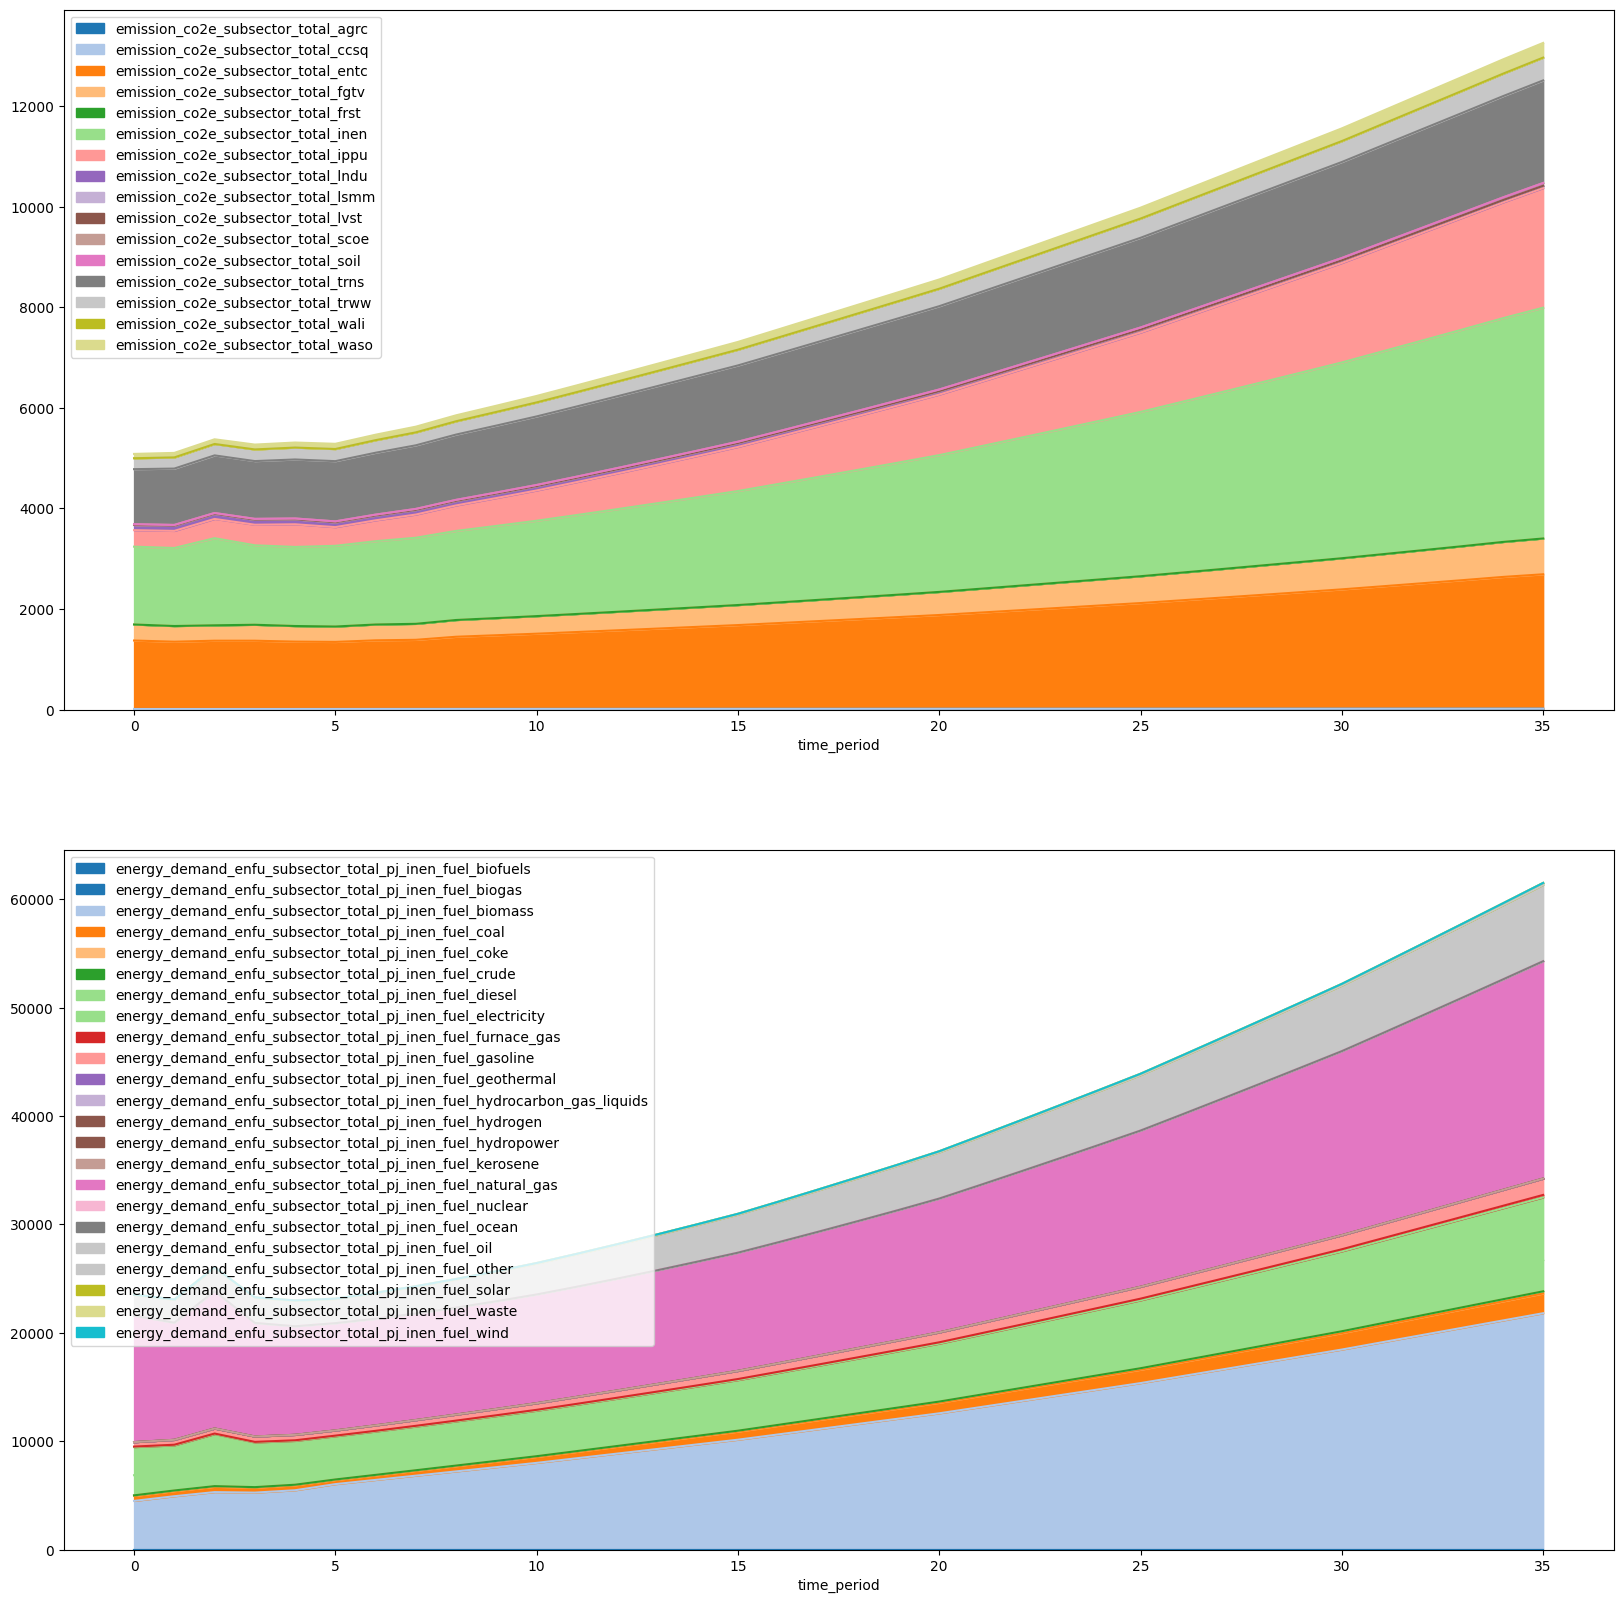

In [29]:
# 3008, 3009, 3031
strat_id, strat_id_intervention = 0, 0

# baseline
dict_filt2 = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id]
    dict_filt2.update({k: val[0]})
primary_id = sisepuede.odpt_primary.get_key_value(**dict_filt2)
df_filt = df_out[
    df_out[sisepuede.key_primary].isin([primary_id])
]

# intervention
dict_filt_invervention = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id_intervention]
    dict_filt_invervention.update({k: val[0]})
primary_id_intervention = sisepuede.odpt_primary.get_key_value(**dict_filt_invervention)
df_filt_intervention = df_out[
    df_out[sisepuede.key_primary].isin([primary_id_intervention])
]


df_in_filt = df_in[
    df_in[sisepuede.key_strategy].isin([strat_id])
]

df_in_filt_intervention = df_in[
    df_in[sisepuede.key_strategy].isin([strat_id_intervention])
]


fig, ax = plt.subplots(2, 1, figsize = (20, 20))
#ax[0].set_ylim(0, 1200)
#ax[1].set_ylim(0, 1200)

palette_func = plt.cm.tab20#plt.cm.hsv

flds = [sisepuede.key_time_period]
if False:
    flds += [
        x for x in df_filt.columns 
        if x.startswith("emission_co2e_subsector_total") 
        and (
            ("ccsq" in x) 
            or ("entc" in x)
            or ("enfu" in x)
            or ("fgtv" in x)
            or ("inen" in x)
            or ("scoe" in x)
            or ("trns" in x)
        )
    ]
    
if False:
    flds += [
        x for x in df_filt.columns 
        if x.startswith("emission_co2e_subsector_total") 
        and (
            ("agrc" in x) 
            or ("lvst" in x)
            or ("lsmm" in x)
            or ("soil" in x)
            or ("frst" in x)
            or ("lndu" in x)
        )
    ]
    
if False:
    flds = [x for x in flds if "trns" in x]
    
if True:
    flds += [
        x for x in df_filt.columns 
        if x.startswith("emission_co2e_subsector_total") 
        and (
            #("entc" in x)
            #or ("fgtv" in x)
            ("subsector_total" in x)
        )
    ]

if False:
    #flds = [x for x in df_filt.columns if x.startswith("energy_demand_enfu") and ("total" in x) and ("subsector" not in x)]# and (("natural_gas" in x) or ("crude" in x) or ("electricity" in x) or ("hydrogen" in x))]
    cat = "rail_passenger"
    pre = "energy_consumption_trns"
    fld_ignore = f"{pre}_{cat}"
    flds = [sisepuede.key_time_period] + [x for x in df_filt.columns if x.startswith(pre) and (cat in x) and (x != fld_ignore)]
    #flds = [x for x in df_filt.columns if x.startswith("passenger_distance")]

if True:
    
    modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_emissions_co2_mne
    modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    modvar_plot = sisepuede.models.model_energy.modvar_trns_energy_consumption_total
    modvar_plot = sisepuede.models.model_energy.modvar_trns_passenger_distance_traveled
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_passenger_distance_traveled
    #modvar_plot = sisepuede.models.model_energy.modvar_trde_demand_pkm
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_mass_distance_traveled
    modvar_plot = sisepuede.models.model_energy.modvar_trns_emissions_co2
    modvar_plot = sisepuede.models.model_energy.modvar_enfu_energy_demand_by_fuel_inen
    #modvar_plot = sisepuede.models.model_afolu.modvar_lndu_area_by_cat
    
    #modvar_plot = model_elec.modvar_entc_nemomod_production_by_technology
    #modvar_plot = sisepuede.models.model_energy.modvar_fgtv_emissions_ch4
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_vehicle_distance_traveled_electricity
    
    df = sisepuede.model_attributes.get_standard_variables(
        df_filt,
        modvar_plot
    )
    df = pd.concat([df_filt[[sisepuede.key_time_period]].reset_index(drop = True), df], axis = 1)
    
    df = df_filt[flds]
    if len(df) > 0:
        for k in df.columns:
            df[k] = sf.vec_bounds(np.array(df[k]), (0, np.inf))
    
    m, n = df.shape
    colors = [palette_func(x/n) for x in range(n)]
    
    df.plot.area(x = sisepuede.key_time_period, ax = ax[0], color = colors)
    
    
    df = sisepuede.model_attributes.get_standard_variables(
        df_filt_intervention,
        modvar_plot
    )
    df = pd.concat([df_filt_intervention[[sisepuede.key_time_period]].reset_index(drop = True), df], axis = 1)
    
    #df = pd.DataFrame(np.array(df_filt_intervention[flds]) - np.array(df_filt[flds]), columns = flds)
    #df = df_filt_intervention[flds]
    #for k in df.columns:
    #    df[k] = sf.vec_bounds(np.array(df[k]), (0, np.inf))
    
    m, n = df.shape
    colors = [palette_func(x/n) for x in range(n)]
    
    df.plot.area(x = sisepuede.key_time_period, ax = ax[1], color = colors)
    #df.plot(ax = ax[1], color = colors)



In [8]:
df = sisepuede.model_attributes.get_standard_variables(
    df_filt,
    sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    #sisepuede.models.model_energy.modvar_trns_passenger_distance_traveled
)
df_int = sisepuede.model_attributes.get_standard_variables(
    df_filt_intervention,
    sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    #sisepuede.models.model_energy.modvar_trns_passenger_distance_traveled
)

In [9]:
##  BASELINE
df.iloc[[0, 35]]

,nemomod_entc_annual_production_by_technology_pp_biogas,nemomod_entc_annual_production_by_technology_pp_biomass,nemomod_entc_annual_production_by_technology_pp_coal,nemomod_entc_annual_production_by_technology_pp_coal_ccs,nemomod_entc_annual_production_by_technology_pp_gas,nemomod_entc_annual_production_by_technology_pp_gas_ccs,nemomod_entc_annual_production_by_technology_pp_geothermal,nemomod_entc_annual_production_by_technology_pp_hydropower,nemomod_entc_annual_production_by_technology_pp_nuclear,nemomod_entc_annual_production_by_technology_pp_ocean,nemomod_entc_annual_production_by_technology_pp_oil,nemomod_entc_annual_production_by_technology_pp_solar,nemomod_entc_annual_production_by_technology_pp_waste_incineration,nemomod_entc_annual_production_by_technology_pp_wind,nemomod_entc_annual_production_by_technology_st_batteries,nemomod_entc_annual_production_by_technology_st_compressed_air,nemomod_entc_annual_production_by_technology_st_flywheels,nemomod_entc_annual_production_by_technology_st_pumped_hydro
0,0.0,17.138944,149.337441,0.0,438.912724,0.0,0.0,2089.185674,81.827453,0.0,158.448101,61.266575,0.0,126.300108,0.000000,0.0,0.0,0.0
35,0.0,0.000000,157.778806,0.0,451.605836,0.0,0.0,3230.803594,111.456776,0.0,121.806727,173.969156,0.0,401.792574,98.999994,0.0,0.0,0.0


In [10]:
##  WITH INTERVENTION
df_int.iloc[[0, 35]]

,nemomod_entc_annual_production_by_technology_pp_biogas,nemomod_entc_annual_production_by_technology_pp_biomass,nemomod_entc_annual_production_by_technology_pp_coal,nemomod_entc_annual_production_by_technology_pp_coal_ccs,nemomod_entc_annual_production_by_technology_pp_gas,nemomod_entc_annual_production_by_technology_pp_gas_ccs,nemomod_entc_annual_production_by_technology_pp_geothermal,nemomod_entc_annual_production_by_technology_pp_hydropower,nemomod_entc_annual_production_by_technology_pp_nuclear,nemomod_entc_annual_production_by_technology_pp_ocean,nemomod_entc_annual_production_by_technology_pp_oil,nemomod_entc_annual_production_by_technology_pp_solar,nemomod_entc_annual_production_by_technology_pp_waste_incineration,nemomod_entc_annual_production_by_technology_pp_wind,nemomod_entc_annual_production_by_technology_st_batteries,nemomod_entc_annual_production_by_technology_st_compressed_air,nemomod_entc_annual_production_by_technology_st_flywheels,nemomod_entc_annual_production_by_technology_st_pumped_hydro
0,0.0,17.138944,144.213725,0.0,423.853779,0.0,0.000000,2062.561041,79.019982,0.0,153.011801,112.074026,0.0,128.927380,0.000000,0.0,0.0,0.0
35,0.0,0.000000,0.000000,0.0,0.000000,0.0,461.686429,2931.674573,0.000000,0.0,0.000000,692.529643,0.0,692.529643,98.999994,0.0,0.0,0.0


In [72]:

# aviation PKM reduction
print("passenger_distance_traveled_trns_aviation")
print(1 - 1.074556e+11/1.432742e+11)
print("\n")



passenger_distance_traveled_trns_aviation
0.2500003489811843




In [37]:
# freight rail emissions reduction
print("emission_co2e_co2_trns_rail_freight")
print(1 - 2.215998/2.954664)
print("\n")

# passenger rail emissions reduction
print("emission_co2e_co2_trns_rail_passenger change:")
print(1 - 0.756085/1.008113)

emission_co2e_co2_trns_rail_freight
0.2500000000000001


emission_co2e_co2_trns_rail_passenger change:
0.24999975201192726


In [131]:
arr_int = np.array(df_int)
arr_int_norm = (arr_int.transpose()/arr_int.sum(axis = 1)).transpose()

pd.DataFrame(arr_int_norm, columns = list(df_int.columns)).iloc[[0, 35]]

,mass_distance_traveled_trns_mt_km_aviation,mass_distance_traveled_trns_mt_km_rail_freight,mass_distance_traveled_trns_mt_km_road_heavy_freight,mass_distance_traveled_trns_mt_km_water_borne
0,0.0,0.342506,0.577156,0.080338
35,0.0,0.514691,0.388331,0.096978


In [133]:
arr = np.array(df)
arr_norm = (arr.transpose()/arr.sum(axis = 1)).transpose()

pd.DataFrame(arr_norm, columns = list(df.columns)).iloc[[0, 35]]

,mass_distance_traveled_trns_mt_km_aviation,mass_distance_traveled_trns_mt_km_rail_freight,mass_distance_traveled_trns_mt_km_road_heavy_freight,mass_distance_traveled_trns_mt_km_water_borne
0,0.0,0.342506,0.577156,0.080338
35,0.0,0.314691,0.588331,0.096978


In [46]:
sisepuede.model_attributes.get_standard_variables(
    df_in_filt,
    sisepuede.models.model_socioeconomic.modvar_econ_gdp
).iloc[[0, 35]].sum(axis = 1)

0     2431.942902
35    4261.821169
dtype: float64

In [48]:
4261.821169/2431.942902


1.752434716084465

In [24]:
[x for x in df_out.columns if "harvested" in x]

df_out[[x for x in df_out.columns if x.startswith("dem_ippu_harvested_wood_tonne")]]


,dem_ippu_harvested_wood_tonne_paper,dem_ippu_harvested_wood_tonne_wood
0,1.574719e+07,1.499843e+06
1,1.573242e+07,1.496707e+06
2,1.571764e+07,1.493564e+06
3,1.570284e+07,1.490414e+06
4,1.568805e+07,1.487258e+06
...,...,...
4207,1.498061e+07,2.014076e+06
4208,1.506952e+07,2.037152e+06
4209,1.515689e+07,2.059962e+06
4210,1.524277e+07,2.082517e+06


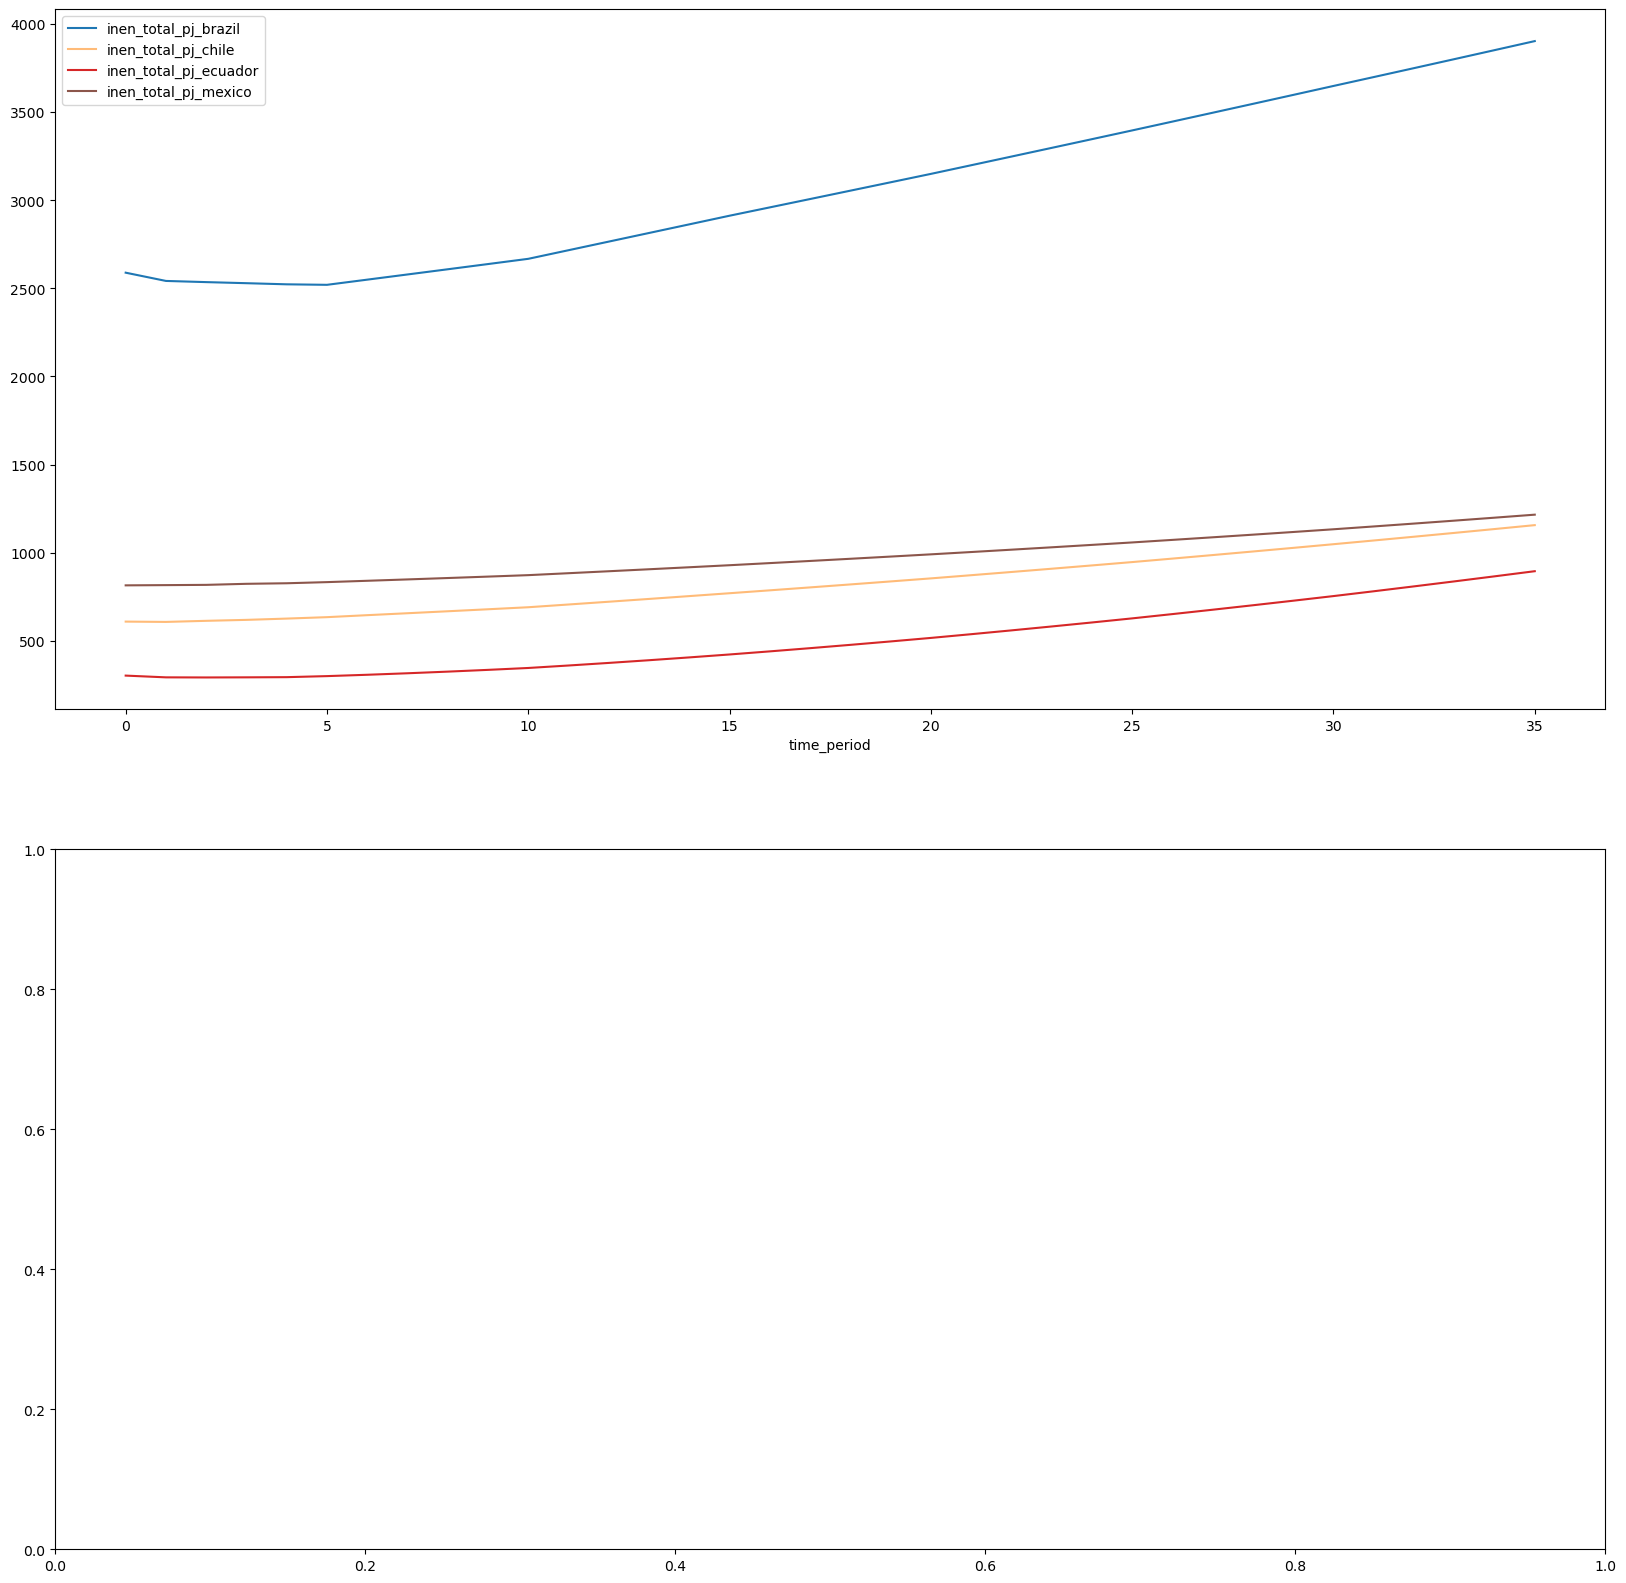

In [24]:
# 3008, 3009, 3031
strat_id, strat_id_intervention = 0, 3011
# baseline
dict_filt2 = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id]
    dict_filt2.update({k: val[0]})
primary_id = sisepuede.odpt_primary.get_key_value(**dict_filt2)

flds =[x for x in df_filt.columns if "energy_demand_enfu_subsector_total_pj_inen" in x]
df_out_cur = df_out_all[df_out_all[sisepuede.key_primary].isin([primary_id])]
flds_plot = []

df_out_tmp = df_out_cur[["time_period"]].drop_duplicates()
 
for region in df_out_cur["region"].unique():
    fld_temp = f"inen_total_pj_{region}"
    vec_new = np.array(df_out_cur[df_out_cur["region"] == region][flds]).sum(axis = 1)
    df_out_tmp[fld_temp] = vec_new


fig, ax = plt.subplots(2, 1, figsize = (20, 20))
#ax[0].set_ylim(0, 140)
#ax[1].set_ylim(0, 140)

palette_func = plt.cm.tab20#plt.cm.hsv



#flds = [x for x in df_filt.columns if x.startswith("energy_demand_enfu_total")]

if True:
    
    
  
    
    m, n = df.shape
    colors = [palette_func(x/n) for x in range(n)]
    
    df_out_tmp.plot(ax = ax[0], color = colors, x = "time_period")
    



In [94]:
sisepuede.model_attributes.get_standard_variables(
    df_filt_intervention,
    modvar_plot
)

,nemomod_entc_annual_production_by_technology_pp_biogas,nemomod_entc_annual_production_by_technology_pp_biomass,nemomod_entc_annual_production_by_technology_pp_coal,nemomod_entc_annual_production_by_technology_pp_coal_ccs,nemomod_entc_annual_production_by_technology_pp_gas,nemomod_entc_annual_production_by_technology_pp_gas_ccs,nemomod_entc_annual_production_by_technology_pp_geothermal,nemomod_entc_annual_production_by_technology_pp_hydropower,nemomod_entc_annual_production_by_technology_pp_nuclear,nemomod_entc_annual_production_by_technology_pp_ocean,nemomod_entc_annual_production_by_technology_pp_oil,nemomod_entc_annual_production_by_technology_pp_solar,nemomod_entc_annual_production_by_technology_pp_waste_incineration,nemomod_entc_annual_production_by_technology_pp_wind,nemomod_entc_annual_production_by_technology_st_batteries,nemomod_entc_annual_production_by_technology_st_compressed_air,nemomod_entc_annual_production_by_technology_st_flywheels,nemomod_entc_annual_production_by_technology_st_pumped_hydro
0,0.0,0.354658,110.181308,0.0,606.997704,0.0,20.485735,104.612210,38.193334,0.0,102.910408,4.832510,0.0,28.884861,0.0,0.455136,0.0,0.0
1,0.0,0.000000,108.857906,0.0,605.039246,0.0,19.485955,99.551780,34.379900,0.0,106.765150,6.151372,0.0,33.251960,0.0,0.000000,0.0,0.0
2,0.0,0.000000,38.488857,0.0,235.504724,0.0,7.335627,41.185606,13.718781,0.0,47.715704,3.569829,0.0,13.222799,0.0,0.001167,0.0,0.0
3,0.0,0.000000,78.952164,0.0,586.438289,0.0,15.576106,98.922043,40.751867,0.0,136.432902,10.715715,0.0,39.145294,0.0,0.000000,0.0,0.0
4,0.0,0.000000,79.270701,0.0,589.519384,0.0,16.181383,75.254141,34.789494,0.0,138.391093,28.712121,0.0,53.643794,0.0,0.000000,0.0,0.0
5,0.0,0.000000,45.531500,0.0,603.941333,0.0,15.819066,84.729042,34.431263,0.0,141.776680,35.622040,0.0,62.633738,0.0,0.000000,0.0,0.0
6,0.0,0.000000,31.542750,0.0,590.002799,0.0,14.481695,105.559821,35.010187,0.0,138.504576,43.368637,0.0,64.219105,0.0,0.000000,0.0,0.0
7,0.0,0.000000,59.960079,0.0,563.777158,0.0,15.049600,111.138692,30.791657,0.0,144.457445,41.270253,0.0,61.731131,0.0,0.001167,0.0,0.0
8,0.0,0.000000,91.166598,0.0,592.605868,0.0,18.684044,109.564881,35.054609,0.0,142.374647,16.669953,0.0,35.513726,0.0,0.000000,0.0,0.0
9,0.0,0.000000,92.014664,0.0,598.118511,0.0,18.857850,110.584095,35.380700,0.0,143.699069,16.825024,0.0,35.844088,0.0,0.000000,0.0,0.0


In [115]:
df_primary = sisepuede.odpt_primary.get_indexing_dataframe(sorted(list(df_out[sisepuede.key_primary].unique())))
df_primary

,primary_id,design_id,strategy_id,future_id
0,0,0,0,0
1,5005,0,3001,0
2,6006,0,3002,0
3,7007,0,3003,0
4,8008,0,3004,0
5,11011,0,3007,0
6,13013,0,3009,0
7,15015,0,3011,0
8,28028,0,3024,0
9,30030,0,3026,0


In [145]:
dfm0 = df_melt[
    df_melt["region"].isin(["chile"]) &
    df_melt["primary_id"].isin([0])
][flds]

dfm3011 = df_melt[
    df_melt["region"].isin(["chile"]) &
    df_melt["primary_id"].isin([15015])
][flds]




In [147]:
dfm3011

,emission_co2e_subsector_total_ccsq,emission_co2e_subsector_total_entc,emission_co2e_subsector_total_fgtv,emission_co2e_subsector_total_inen,emission_co2e_subsector_total_scoe,emission_co2e_subsector_total_trns
756,-0.62179,16.876111,3.362946,44.966099,4.063850,18.167096
757,-0.62179,17.375859,3.661126,44.612469,4.342637,18.476769
758,-0.62179,11.881168,2.569147,44.964011,4.533113,18.641787
759,-0.62179,16.454608,3.270712,45.286691,4.527493,18.886208
760,-0.62179,16.415354,3.292909,45.680740,4.543370,19.093813
761,-0.62179,15.948706,3.192022,46.106198,4.593363,19.253440
762,-0.62179,16.096923,3.179560,46.745314,4.560601,18.932082
763,-0.62179,14.262066,2.927085,47.369038,4.620676,19.072509
764,-0.62179,17.468895,3.403551,47.997597,4.680650,19.204319
765,-0.62179,17.699948,3.454232,48.631204,4.740528,19.326176


In [108]:
df_filt[[x for x in df_filt.columns if x.startswith("emission_co2e_subsector_total")]].sum(axis = 1)

1512     743.490976
1513     750.980582
1514     674.385378
1515     744.540177
1516     753.344259
1517     760.378541
1518     764.571848
1519     776.302074
1520     792.501035
1521     803.175663
1522     813.762053
1523     826.089256
1524     837.632266
1525     849.121769
1526     860.516188
1527     871.779209
1528     882.957293
1529     893.851282
1530     904.540361
1531     915.003699
1532     925.556807
1533     936.071012
1534     946.463935
1535     956.827156
1536     967.184538
1537     977.569830
1538     988.135400
1539     998.649163
1540    1009.240631
1541    1019.948289
1542    1030.773235
1543    1041.955282
1544    1053.144446
1545    1064.505743
1546    1076.046675
1547    1085.935159
dtype: float64

In [109]:
df_filt_intervention[[x for x in df_filt_intervention.columns if x.startswith("emission_co2e_subsector_total")]].sum(axis = 1)

1872     743.499739
1873     750.980582
1874     674.385358
1875     744.540177
1876     753.344259
1877     760.378541
1878     764.571908
1879     776.302035
1880     792.501100
1881     803.175662
1882     813.762094
1883     825.258350
1884     835.938767
1885     846.534056
1886     857.002696
1887     867.308429
1888     877.494595
1889     887.364259
1890     896.996591
1891     906.367826
1892     915.773864
1893     925.118775
1894     934.296934
1895     943.417999
1896     952.501368
1897     961.566679
1898     970.768827
1899     979.878961
1900     989.040483
1901     998.267345
1902    1007.573282
1903    1017.181265
1904    1026.756185
1905    1036.463221
1906    1046.310025
1907    1054.464651
dtype: float64

In [15]:
fp_sqlite_intermediate = sisepuede.file_struct.fp_sqlite_tmp_nemomod_intermediate
engine = sqlalchemy.create_engine(f"sqlite:///{fp_sqlite_intermediate}")


In [19]:
df = sqlutil.sql_table_to_df(engine, "vdiscountedcapitalinvestment")

df[df["y"] == "1000"]

,r,t,y,val,solvedtm
0,mexico,pp_coal,1000,5.141651e+03,2023-03-07 17:33:07.549
1,mexico,pp_gas,1000,2.500525e+04,2023-03-07 17:33:07.549
2,mexico,pp_nuclear,1000,8.171675e+03,2023-03-07 17:33:07.549
3,mexico,pp_wind,1000,4.459853e+03,2023-03-07 17:33:07.549
4,mexico,supply_fuel_coal,1000,1.853715e+06,2023-03-07 17:33:07.549
5,mexico,supply_fuel_diesel,1000,5.060592e+06,2023-03-07 17:33:07.549
6,mexico,supply_fuel_electricity,1000,1.231551e+05,2023-03-07 17:33:07.549
7,mexico,supply_fuel_gasoline,1000,1.046768e+07,2023-03-07 17:33:07.549
8,mexico,supply_fuel_hydrocarbon_gas_liquids,1000,7.175443e+05,2023-03-07 17:33:07.549
9,mexico,supply_fuel_hydrogen,1000,7.209993e+01,2023-03-07 17:33:07.549


<AxesSubplot:>

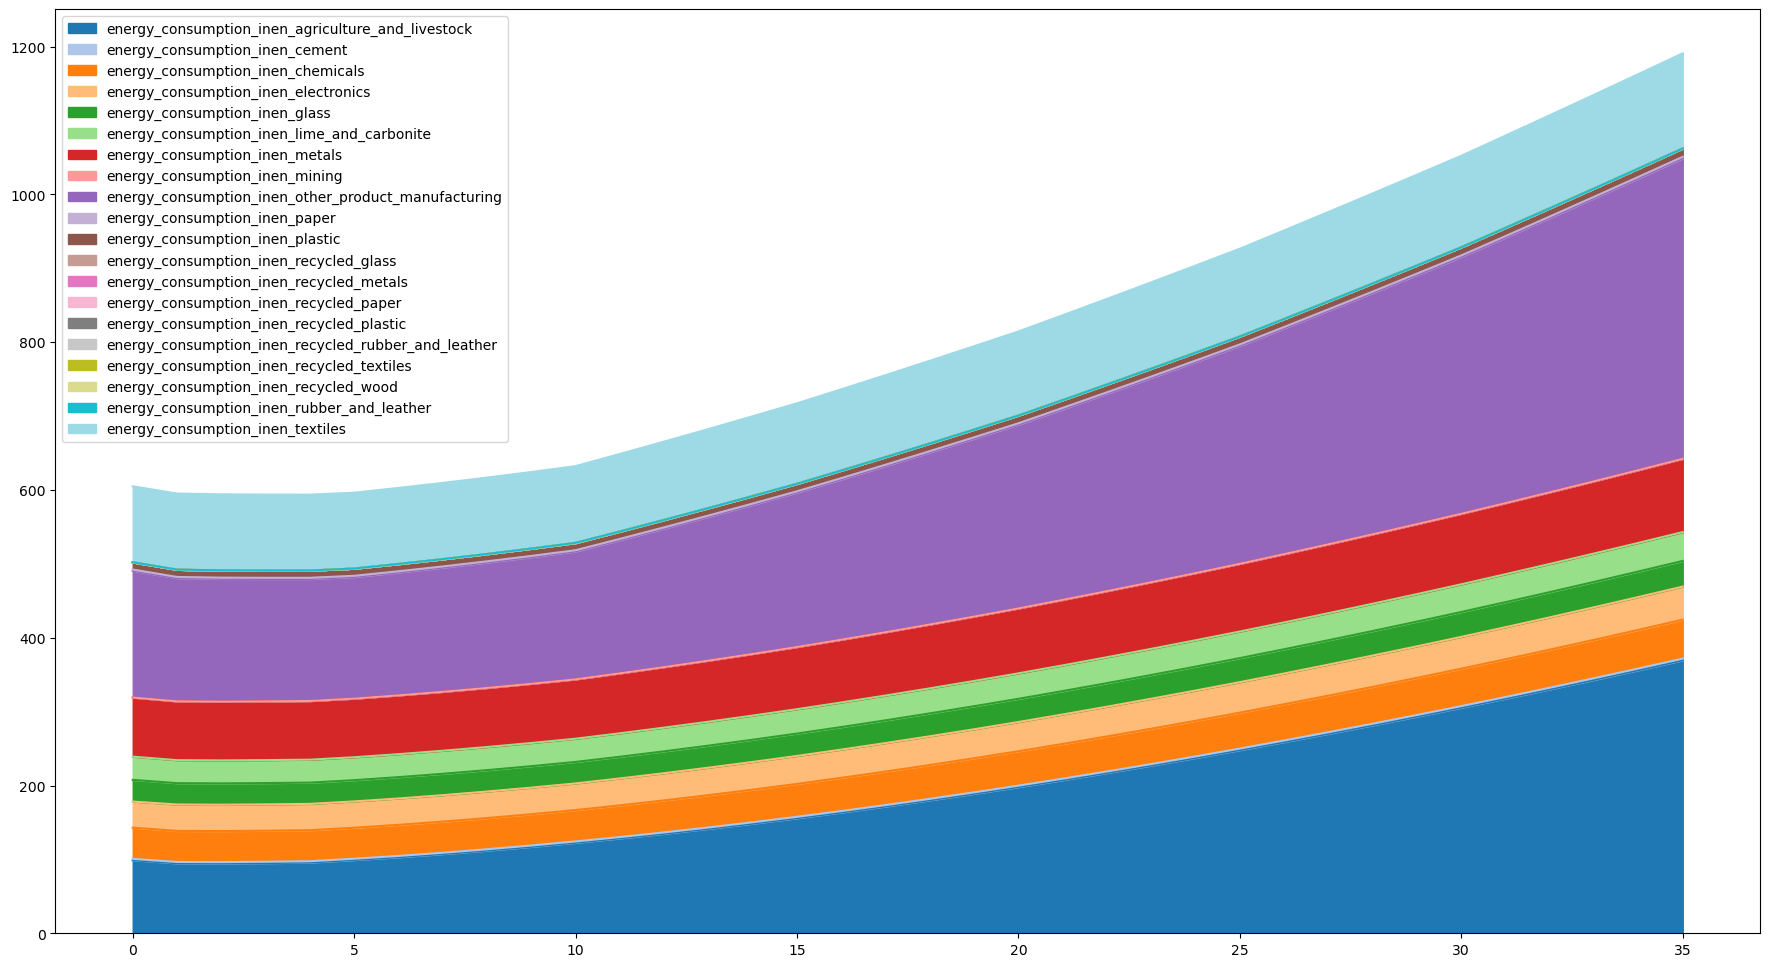

In [86]:
fig, ax = plt.subplots(figsize = (22, 12))
palette_func = plt.cm.tab20#plt.cm.hsv

df = sisepuede.model_attributes.get_standard_variables(
    df_filt,
    sisepuede.models.model_energy.modvar_inen_energy_consumption_total
)

m, n = df.shape
colors = [palette_func(x/n) for x in range(n)]



df.plot.area(ax = ax, color = colors)

In [103]:
s_o = [
    x for x in df_filt_intervention.columns 
    if "emission_co2e_" in x 
    and ("subsector_total" not in x) 
    and (
        ("_entc_" in x) 
        or ("_inen_" in x)
        or ("_scoe_" in x)
        or ("_ccsq_" in x)
        or ("_trns_" in x)
        or ("_enfu_" in x)
        or ("_fgtv_" in x)
    )
]
s_m = [x for x in df_filt_intervention_m.columns if "emission_co2e_" in x and ("subsector_total" not in x)]


In [66]:
df_in[[x for x in df_in.columns if x.startswith("totalvalue")]].columns

Index([], dtype='object')

In [158]:
#df_read = pd.read_csv("/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/out/summary_energy_results_for_nidhi_sisepuede_run_2023-03-08T01;13;08.959671/summary_energy_results_for_nidhi_sisepuede_run_2023-03-08T01;13;08.959671.csv")

dfr = df_read[df_read["region"].isin(["chile"]) & df_read["variable"].isin(flds)]

dfr[dfr["primary_id"].isin([0]) & dfr["time_period"].isin([5])]["value"].sum()

88.47193769480012

In [159]:
dfr[dfr["primary_id"].isin([15015]) & dfr["time_period"].isin([5])]["value"].sum()


88.47193769480002

In [ ]:
###### df_out[df_out["primary_id"] == 0][[x for x in df_out.columns if ("energy_demand_enfu_total_fuel" in x) and ("demand" in x)]].iloc[0]


strat_id, strat_id_intervention = 0, 3001

# baseline
dict_filt2 = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id]
    dict_filt2.update({k: val[0]})
primary_id = sisepuede.odpt_primary.get_key_value(**dict_filt2)

df_filt = df_out[
    df_out[sisepuede.key_primary].isin([primary_id])
]


# intervention
dict_filt3 = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id_intervention]
    dict_filt3.update({k: val[0]})
primary_id_intervention = sisepuede.odpt_primary.get_key_value(**dict_filt3)

df_filt_int = df_out[
    df_out[sisepuede.key_primary].isin([primary_id_intervention])
]

#modvar = sisepuede.models.model_electricity.modvar_enfu_energy_demand_by_fuel_total
model_energy = sisepuede.models.model_energy
modvar = model_energy.modvar_enfu_energy_demand_by_fuel_inen#
modvar = "Energy Consumption from Industrial Energy"
modvar = "Energy Consumption from SCOE"
#modvar = model_energy.modvar_inen_emissions_co2
modvar = sisepuede.models.model_energy.modvar_fgtv_emissions_ch4

df_test_0 = sisepuede.model_attributes.get_standard_variables(
    df_filt,
    modvar
);

df_test_int = sisepuede.model_attributes.get_standard_variables(
    df_filt_int,
    modvar
);



In [42]:
df_filt_intervention[
    [x for x in df_filt_intervention.columns if ("subsector_total" in x) and ("ccsq" in x)]
]

,emission_co2e_subsector_total_ccsq,energy_demand_enfu_subsector_total_pj_ccsq_fuel_biofuels,energy_demand_enfu_subsector_total_pj_ccsq_fuel_biogas,energy_demand_enfu_subsector_total_pj_ccsq_fuel_biomass,energy_demand_enfu_subsector_total_pj_ccsq_fuel_coal,energy_demand_enfu_subsector_total_pj_ccsq_fuel_coke,energy_demand_enfu_subsector_total_pj_ccsq_fuel_crude,energy_demand_enfu_subsector_total_pj_ccsq_fuel_diesel,energy_demand_enfu_subsector_total_pj_ccsq_fuel_electricity,energy_demand_enfu_subsector_total_pj_ccsq_fuel_furnace_gas,...,energy_demand_enfu_subsector_total_pj_ccsq_fuel_hydropower,energy_demand_enfu_subsector_total_pj_ccsq_fuel_kerosene,energy_demand_enfu_subsector_total_pj_ccsq_fuel_natural_gas,energy_demand_enfu_subsector_total_pj_ccsq_fuel_nuclear,energy_demand_enfu_subsector_total_pj_ccsq_fuel_ocean,energy_demand_enfu_subsector_total_pj_ccsq_fuel_oil,energy_demand_enfu_subsector_total_pj_ccsq_fuel_other,energy_demand_enfu_subsector_total_pj_ccsq_fuel_solar,energy_demand_enfu_subsector_total_pj_ccsq_fuel_waste,energy_demand_enfu_subsector_total_pj_ccsq_fuel_wind
2736,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2737,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2738,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2739,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2740,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2741,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2742,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2743,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2744,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2745,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
flds

['emission_co2e_subsector_total_ccsq',
 'emission_co2e_subsector_total_entc',
 'emission_co2e_subsector_total_fgtv',
 'emission_co2e_subsector_total_inen',
 'emission_co2e_subsector_total_scoe',
 'emission_co2e_subsector_total_trns']

In [10]:
modvar = sisepuede.models.model_energy.modvar_fgtv_frac_reduction_fugitive_leaks
df = sisepuede.model_attributes.get_standard_variables(
    df_filt,
    #sisepuede.models.model_electricity.modvar_entc_nemomod_discounted_capital_investment
    #sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    sisepuede.models.model_energy.modvar_fgtv_emissions_ch4
)

In [9]:
df_out = sisepuede.read_output(None)
df_in = sisepuede.experimental_manager.dict_future_trajectories.get("brazil").generate_future_from_lhs_vector(None, None, 0, True)



In [35]:

var = sisepuede.models.model_energy.modvar_inen_emissions_ch4
sisepuede.model_attributes.get_standard_variables(
    df_out[df_out["primary_id"] == 0], 
    var
).head()

,emission_co2e_ch4_inen_agriculture_and_livestock,emission_co2e_ch4_inen_cement,emission_co2e_ch4_inen_chemicals,emission_co2e_ch4_inen_electronics,emission_co2e_ch4_inen_glass,emission_co2e_ch4_inen_lime_and_carbonite,emission_co2e_ch4_inen_metals,emission_co2e_ch4_inen_other_product_manufacturing,emission_co2e_ch4_inen_paper,emission_co2e_ch4_inen_plastic,emission_co2e_ch4_inen_recycled_glass,emission_co2e_ch4_inen_recycled_metals,emission_co2e_ch4_inen_recycled_paper,emission_co2e_ch4_inen_recycled_plastic,emission_co2e_ch4_inen_recycled_rubber_and_leather,emission_co2e_ch4_inen_recycled_textiles,emission_co2e_ch4_inen_recycled_wood,emission_co2e_ch4_inen_rubber_and_leather,emission_co2e_ch4_inen_textiles
0,0.000652,0.157110,0.153208,0.000519,0.003897,0.000189,0.052969,0.000461,0.447092,0.002900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000641
1,0.000642,0.153350,0.159578,0.000535,0.003931,0.000169,0.051239,0.000361,0.453517,0.003039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000643
2,0.000642,0.153189,0.159410,0.000535,0.003926,0.000169,0.051184,0.000359,0.453048,0.003035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000642
3,0.000644,0.153027,0.159242,0.000534,0.003920,0.000168,0.051129,0.000358,0.452579,0.003031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000641
4,0.000644,0.152865,0.159073,0.000534,0.003915,0.000168,0.051073,0.000356,0.452108,0.003027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000640


In [34]:

var = sisepuede.models.model_energy.modvar_inen_en_prod_intensity_factor
sisepuede.model_attributes.get_standard_variables(
    df_in[df_in["strategy_id"] == 0], 
    var
).head()

,consumpinit_inen_energy_tj_per_tonne_production_cement,consumpinit_inen_energy_tj_per_tonne_production_chemicals,consumpinit_inen_energy_tj_per_tonne_production_electronics,consumpinit_inen_energy_tj_per_tonne_production_glass,consumpinit_inen_energy_tj_per_tonne_production_lime_and_carbonite,consumpinit_inen_energy_tj_per_tonne_production_metals,consumpinit_inen_energy_tj_per_tonne_production_paper,consumpinit_inen_energy_tj_per_tonne_production_plastic,consumpinit_inen_energy_tj_per_tonne_production_recycled_glass,consumpinit_inen_energy_tj_per_tonne_production_recycled_metals,consumpinit_inen_energy_tj_per_tonne_production_recycled_paper,consumpinit_inen_energy_tj_per_tonne_production_recycled_plastic,consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_recycled_textiles,consumpinit_inen_energy_tj_per_tonne_production_recycled_wood,consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_textiles
0,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
1,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
2,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
3,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
4,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008


In [13]:

var = "NemoMod :math:\\text{CO}_2 Emissions from Electricity Generation"
sisepuede.model_attributes.get_standard_variables(
    df_out[df_out["time_period"] > 34], 
    var
)

,emission_co2e_co2_entc_generation_pp_biogas,emission_co2e_co2_entc_generation_pp_biomass,emission_co2e_co2_entc_generation_pp_coal,emission_co2e_co2_entc_generation_pp_gas,emission_co2e_co2_entc_generation_pp_geothermal,emission_co2e_co2_entc_generation_pp_hydropower,emission_co2e_co2_entc_generation_pp_nuclear,emission_co2e_co2_entc_generation_pp_ocean,emission_co2e_co2_entc_generation_pp_oil,emission_co2e_co2_entc_generation_pp_solar,emission_co2e_co2_entc_generation_pp_waste_incineration,emission_co2e_co2_entc_generation_pp_wind
0,0.0,22.522807,0.813540,57.079049,0.0,0.0,0.0,0.0,19.424343,0.0,0.777381,0.0
1,0.0,20.109595,0.746509,70.568198,0.0,0.0,0.0,0.0,19.424343,0.0,0.777381,0.0


In [82]:
df_melt

,primary_id,region,time_period,nemomod_entc_discounted_capital_investment_fp_hydrogen_electrolysis,nemomod_entc_discounted_capital_investment_fp_hydrogen_gasification,nemomod_entc_discounted_capital_investment_fp_hydrogen_reformation,nemomod_entc_discounted_capital_investment_pp_biogas,nemomod_entc_discounted_capital_investment_pp_biomass,nemomod_entc_discounted_capital_investment_pp_coal,nemomod_entc_discounted_capital_investment_pp_coal_ccs,...,passenger_distance_traveled_trns_aviation,passenger_distance_traveled_trns_human_powered,passenger_distance_traveled_trns_powered_bikes,passenger_distance_traveled_trns_public,passenger_distance_traveled_trns_rail_passenger,passenger_distance_traveled_trns_road_heavy_regional,passenger_distance_traveled_trns_road_light,dem_trde_freight_mt_km,dem_trde_private_and_public_passenger_km,dem_trde_regional_passenger_km
0,0,brazil,0,0.0,0.0,0.0,0.0,0.0,13160.943025,0.0,...,4.518675e+10,0.0,3.019083e+10,1.520643e+11,3.165051e+10,3.730238e+10,1.137164e+12,1.988759e+06,1.319419e+12,1.141396e+11
1,0,brazil,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,4.825007e+10,0.0,3.005178e+10,1.503540e+11,3.076914e+10,3.563810e+10,1.147626e+12,1.980442e+06,1.328032e+12,1.146573e+11
2,0,brazil,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,5.092513e+10,0.0,2.921055e+10,1.462186e+11,3.080810e+10,3.343006e+10,1.161078e+12,1.972124e+06,1.336507e+12,1.151633e+11
3,0,brazil,3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,5.114122e+10,0.0,2.939099e+10,1.471218e+11,3.093882e+10,3.357191e+10,1.168250e+12,1.963807e+06,1.344763e+12,1.156520e+11
4,0,brazil,4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,5.134630e+10,0.0,2.956424e+10,1.479890e+11,3.106289e+10,3.370654e+10,1.175136e+12,1.955490e+06,1.352690e+12,1.161157e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,42042,mexico,31,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,4.197462e+10,0.0,2.243954e+10,1.123251e+11,2.539332e+10,2.755446e+10,8.919398e+11,1.197735e+06,1.026704e+12,9.492241e+10
2012,42042,mexico,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,4.233814e+10,0.0,2.255982e+10,1.129272e+11,2.561324e+10,2.779309e+10,8.967208e+11,1.225401e+06,1.032208e+12,9.574448e+10
2013,42042,mexico,33,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,4.269801e+10,0.0,2.267898e+10,1.135237e+11,2.583095e+10,2.802933e+10,9.014574e+11,1.253067e+06,1.037660e+12,9.655828e+10
2014,42042,mexico,34,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,4.305436e+10,0.0,2.279707e+10,1.141148e+11,2.604653e+10,2.826326e+10,9.061513e+11,1.280733e+06,1.043063e+12,9.736415e+10


In [42]:
import sqlalchemy
import sql_utilities as su
engine = sqlalchemy.create_engine(f"sqlite:///{sisepuede.fp_base_output_raw}.sqlite")
df_read = su.sql_table_to_df(engine, "MODEL_OUTPUT")

In [35]:
sisepuede.database.dict_all_tables#read_table(sisepuede.database.table_name_attribute_primary)
idt = sisepuede.database.db.dict_iterative_database_tables.get(sisepuede.database.table_name_attribute_primary)


In [116]:
sisepuede.model_attributes.dict_attributes.keys()

dict_keys(['ts_group_2', 'cat_scoe', 'cat_storage', 'unit_monetary', 'ts_group_1', 'cat_landuse', 'cat_technology', 'cat_soil_management', 'unit_volume', 'cat_waste_solid', 'cat_economy', 'dim_time_period', 'unit_energy', 'cat_agriculture', 'cat_transportation_demand', 'cat_waste_liquid', 'cat_general', 'unit_power', 'emission_gas', 'cat_manure_management', 'dim_strategy_id', 'abbreviation_sector', 'cat_forest', 'cat_wastewater_treatment', 'hour', 'time_slice', 'abbreviation_subsector', 'cat_industry', 'cat_fuel', 'mode', 'dim_design_id', 'cat_ccsq', 'cat_transportation', 'region', 'unit_length', 'unit_area', 'nemomod_table', 'unit_mass', 'cat_livestock'])

In [5]:
df_out = sisepuede.read_output(None)

In [5]:
vars_extract = sisepuede.model_attributes.build_varlist("Energy Technology", "NemoMod Discounted Capital Investment")
df_out = sisepuede.read_output(None)

subsectors = []
for sector in ["Energy", "IPPU"]:
    subsectors += sisepuede.model_attributes.get_sector_subsectors(sector)
attr_subsec = sisepuede.model_attributes.dict_attributes.get("abbreviation_subsector")
dict_subsector_name_to_abv = attr_subsec.field_maps.get(f"subsector_to_{attr_subsec.key}")

# add in subsector emission totals
vars_extract += [f"emission_co2e_subsector_total_{dict_subsector_name_to_abv.get(x)}" for x in subsectors]

for subsector in subsectors:
    modvars_cur = sisepuede.model_attributes.get_subsector_variables(
        subsector,
        var_type = "output"
    )[1]

    vars_cur = sum([sisepuede.model_attributes.dict_model_variables_to_variables.get(x) for x in modvars_cur], [])
    vars_extract += vars_cur

    
fields_ind = [
    sisepuede.key_primary,
    sisepuede.key_region,
    sisepuede.key_time_period
]
fields_ext = [x for x in vars_extract if x in df_out.columns]
df_melt = df_out[fields_ind + fields_ext];
print("here")

dir_pkg = os.path.join(sisepuede.file_struct.dir_out, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}")
os.makedirs(dir_pkg) if not os.path.exists(dir_pkg) else None

# write output
pd.melt(
    df_melt,
    fields_ind,
    fields_ext
).to_csv(
    os.path.join(dir_pkg, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}.csv"),
    index = None,
    encoding = "UTF-8"
)



for tab in ["ATTRIBUTE_PRIMARY", "ATTRIBUTE_STRATEGY"]:
    sisepuede.database.db.read_table(tab).to_csv(
        os.path.join(dir_pkg, f"{tab}.csv"),
        index = None,
        encoding = "UTF-8"
    )

    
df_primary = sisepuede.odpt_primary.get_indexing_dataframe(sorted(list(df_out[sisepuede.key_primary].unique())))
df_primary.to_csv(
    os.path.join(dir_pkg, f"ATTRIBUTE_PRIMARY.csv"),
    index = None,
    encoding = "UTF-8"
)


here


In [15]:
attr_strat = sisepuede.database.db.read_table("ATTRIBUTE_STRATEGY")
attr_strat

,strategy_id,strategy,baseline_strategy_id
0,0,Baseline NDP,1
1,1,Test AFOLU,0
2,2,Test Energy,0
3,1001,AFOLU Specific Strategies Start,0
4,2001,Circular Economy Specific Strategies Start,0
5,3001,FGTV: Minimize leaks,0
6,3002,FGTV: Maximize flaring,0
7,3003,FGTV: All Fugitive Emissions Transformations,0
8,3004,INEN: Maximize industrial energy efficiency,0
9,3005,INEN: Maximize industrial production efficiency,0


In [7]:
df_primary = sisepuede.odpt_primary.get_indexing_dataframe(sorted(list(df_out[sisepuede.key_primary].unique())))
df_primary

,primary_id,design_id,strategy_id,future_id
0,0,0,0,0
1,5005,0,3001,0
2,6006,0,3002,0
3,7007,0,3003,0
4,8008,0,3004,0
5,9009,0,3005,0
6,10010,0,3006,0
7,11011,0,3007,0
8,12012,0,3008,0
9,13013,0,3009,0


In [64]:
x = [25.8, 59.7, 82]
x = np.array([x, np.ones(len(x))]).transpose()
y = np.array([[0.5, 0.29, 0.102]]).transpose()


np.linalg.inv(np.dot(x.transpose(), x))


array([[ 6.24357432e-04, -3.48599566e-02],
       [-3.48599566e-02,  2.27968091e+00]])

In [70]:
xtx_inv = np.linalg.inv(np.dot(x.transpose(), x))
xty = np.dot(x.transpose(), y)
b_hat = np.dot(xtx_inv, xty)


np.dot(x, b_hat)

b_hat

array([[-0.00700924],
       [ 0.68868283]])

<AxesSubplot: >

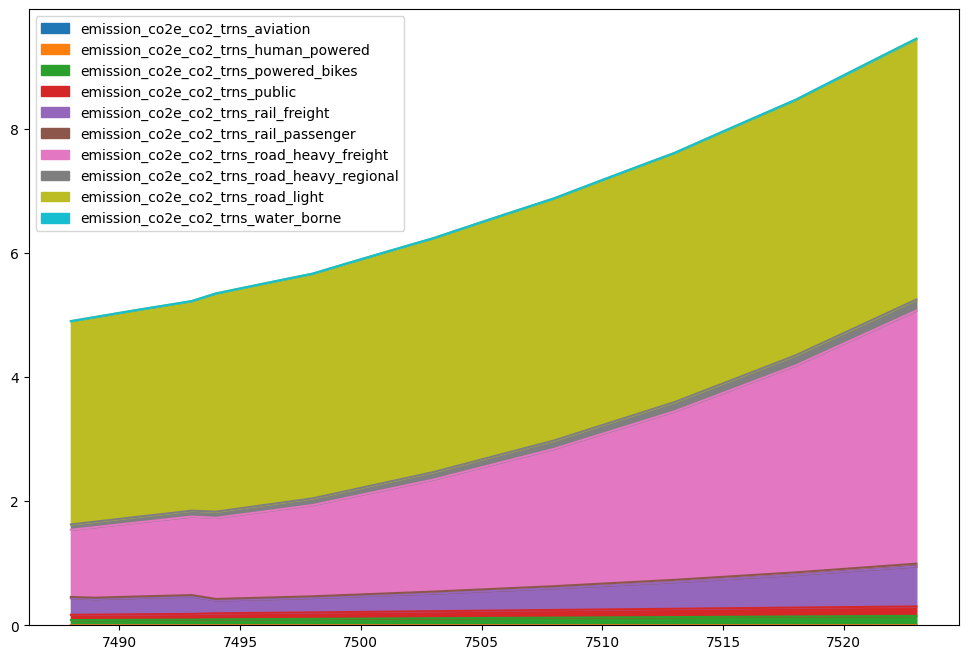

In [6]:
df_plot = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin(["guatemala"])
][[x for x in df_out.columns if x.startswith("emission_co2e_co2") and ("trns" in x)]]

fig, ax = plt.subplots(figsize = (12, 8))
df_plot.plot.area(ax = ax)

In [8]:
df_try = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin(["brazil"])
];

In [37]:
subsec = "Industrial Energy"
dict_repl = {
    "Carbon Capture and Sequestration": "CCSQ",
    "Stationary Combustion and Other Energy": "SCOE"
}

for subsec in ["Carbon Capture and Sequestration", "Industrial Energy", "Stationary Combustion and Other Energy", "Transportation"]:
    #sisepuede.model_attributes.get_standard_variables(
    #    df_try,
        #"Energy Demand by Fuel in Industrial Energy"
    #    "Energy Consumption from Transportation"
    #)
    
    snm = dict_repl.get(subsec, subsec)
    
    vl_1 = sisepuede.model_attributes.build_varlist(
        subsec, f"Energy Consumption from {snm}"
    )
    vl_2 = sisepuede.model_attributes.build_varlist(
        "Energy Fuels", f"Energy Demand by Fuel in {snm}"
    )
    
    print(subsec)
    print("-"*len(subsec) + "\n")
    
    str_print = " +\n".join(vl_1) + "\n = \n" + " +\n".join(vl_2) + "\n\n\n"
    
    print(str_print)



Carbon Capture and Sequestration
--------------------------------

energy_consumption_ccsq_direct_air_capture
 = 
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biofuels +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biogas +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biomass +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_coal +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_coke +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_diesel +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_electricity +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gas_furnace +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gas_petroleum_liquid +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gasoline +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_geothermal +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_hydrogen +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_hydropower +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_kerosene +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_nat

In [17]:
df_out[
    (df_out["time_period"] == 35) &
    (df_out["primary_id"] == 0)
][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_inen_fuel_coal"]]




,primary_id,region,energy_demand_enfu_subsector_total_pj_inen_fuel_coal
35,0,argentina,229.046741
971,0,brazil,1260.032978
1907,0,chile,121.707515
2843,0,colombia,355.019806
3779,0,costa_rica,41.374175
4715,0,dominican_republic,83.226304
5651,0,ecuador,61.921287
6587,0,el_salvador,26.714798
7523,0,guatemala,94.181011
8459,0,honduras,38.230958


In [10]:
df_out[df_out["time_period"] == 35][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_trns_fuel_electricity"]]

,primary_id,region,energy_demand_enfu_subsector_total_pj_trns_fuel_electricity
35,0,argentina,2.422414
71,5005,argentina,2.422414
107,6006,argentina,2.422414
143,7007,argentina,2.422414
179,8008,argentina,2.422414
...,...,...,...
15767,25025,uruguay,0.169664
15803,26026,uruguay,0.169664
15839,27027,uruguay,0.169664
15875,28028,uruguay,0.169664


In [11]:
dict_check = sisepuede.experimental_manager.dict_future_trajectories["brazil"].dict_sampling_units
#for k in dict_check.keys():
#    if "frac_trns_fuelmix_public_electricity" in dict_check[k].variable_specifications:
#        print(k)
su = dict_check.get(1223)
su.generate_future(0, 1, baseline_future_q = True)
su.variable_specifications

['frac_trns_fuelmix_public_electricity']

In [82]:
baseline_future_q = True

In [12]:
baseline_future_q = True
strat_base = 0
rv = su.uncertainty_ramp_vector
vs = su.variable_specifications[0]

dict_ordered_traj_arrays = su.ordered_trajectory_arrays.get((vs, None))
dict_scalar_diff_arrays = su.scalar_diff_arrays.get((vs, None))
dict_var_info = su.dict_variable_info.get((vs, None))

# order the uniform scaling by the ordered trajectory arrays
vec_unif_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["uniform_scaling_q"], (vs, None))
# gives 1s where we keep standard fanning (using the ramp vector) and 0s where we use uniform scaling
vec_base = 1 - vec_unif_scalar
#
if max(vec_unif_scalar) > 0:
    vec_max_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["max_scalar"], (vs, None))
    vec_min_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["min_scalar"], (vs, None))
    vec_unif_scalar = vec_unif_scalar*(vec_min_scalar + lhs_trial_x*(vec_max_scalar - vec_min_scalar)) if not baseline_future_q else np.ones(vec_unif_scalar.shape)

vec_unif_scalar = np.array([vec_unif_scalar]).transpose()
vec_base = np.array([vec_base]).transpose()

In [13]:
delta_max = dict_scalar_diff_arrays.get("max_tp_end_delta")
delta_min = dict_scalar_diff_arrays.get("min_tp_end_delta")
delta_diff = delta_max - delta_min
delta_val = delta_min + 1*delta_diff

In [14]:
# delta and uniform scalar don't apply if operating under baseline future
delta_vec = 0.0 if baseline_future_q else (rv * np.array([delta_val]).transpose())

arr_out = dict_ordered_traj_arrays.get("data") + delta_vec
arr_out = arr_out*vec_base + vec_unif_scalar*dict_ordered_traj_arrays.get("data")

In [18]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)
#array_strat_deltas = np.concatenate(
#	series_strats.apply(
#		self.dict_strategy_info["difference_arrays_by_strategy"].get,
#		args = (np.zeros((1, len(self.time_periods))), )
#	)
#)*lhs_mult_deltas

array_strat_deltas *= lhs_mult_deltas
arr_out = (array_strat_deltas + arr_out[w, :]) if (len(w) > 0) else arr_out

In [20]:
series_strats

[0, 1, 2, 1001, 2001, 3001, 4001, 5001]

In [121]:
xx = series_strats.apply(
    su.dict_strategy_info["difference_arrays_by_strategy"].get,
    args = (np.zeros((1, len(su.time_periods))), )
)

In [130]:
dict_test = {"this": 5, "that": 9}


In [127]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)



In [112]:
su.dict_strategy_info["difference_arrays_by_strategy"].get(series_strats[1])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03913043,
        0.07826087, 0.1173913 , 0.15652174, 0.19565217, 0.23478261,
        0.27391304, 0.31304348, 0.35217391, 0.39130435, 0.43043478,
        0.46956522, 0.50869565, 0.54782609, 0.58695652, 0.62608696,
        0.66521739, 0.70434783, 0.74347826, 0.7826087 , 0.82173913,
        0.86086957, 0.9       , 0.9       , 0.9       , 0.9       ,
        0.9       ]])

In [8]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)

df_try[df_try["time_period"] == 35][["strategy_id", "time_period"] + [x for x in df_try.columns if x.startswith("frac_trns_fuelmix")]]

,strategy_id,time_period,frac_trns_fuelmix_aviation_electricity,frac_trns_fuelmix_aviation_hydrogen,frac_trns_fuelmix_aviation_kerosene,frac_trns_fuelmix_powered_bikes_electricity,frac_trns_fuelmix_powered_bikes_gasoline,frac_trns_fuelmix_public_biofuels,frac_trns_fuelmix_public_diesel,frac_trns_fuelmix_public_electricity,...,frac_trns_fuelmix_road_heavy_regional_natural_gas,frac_trns_fuelmix_road_light_biofuels,frac_trns_fuelmix_road_light_diesel,frac_trns_fuelmix_road_light_electricity,frac_trns_fuelmix_road_light_gasoline,frac_trns_fuelmix_road_light_hydrogen,frac_trns_fuelmix_water_borne_diesel,frac_trns_fuelmix_water_borne_electricity,frac_trns_fuelmix_water_borne_hydrogen,frac_trns_fuelmix_water_borne_natural_gas
35,0,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
71,1,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
107,2,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
143,1001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
179,2001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
215,3001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
251,3002,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
287,3003,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
323,3004,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
359,3005,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0


In [7]:
df_try

,future_id,time_period,strategy_id,area_gnrl_country_ha,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,avgmass_lvst_animal_cattle_nondairy_kg,...,yf_agrc_fruits_tonne_ha,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha
0,0,0,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.625305,0.928300,2.714180,1.650240,4.404067,1.053567,5.752500,74.202600,16.945400,23.352171
1,0,1,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,18.450614,0.908800,1.923760,1.561520,4.602733,1.558033,5.464300,75.176300,17.112775,24.085471
2,0,2,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.820124,0.938300,2.034620,1.704260,5.412067,1.330933,6.213100,74.455900,17.432550,24.498743
3,0,3,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.747876,0.869200,2.256860,1.743060,5.181767,1.568433,6.307400,74.575900,17.414775,25.249429
4,0,4,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.682295,0.875600,1.987220,1.608520,5.488767,1.762200,6.063300,74.657000,17.579100,25.731600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0,31,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,33.595444,1.494550,3.391959,2.745561,9.368702,3.007875,10.349365,127.431024,30.005528,43.920920
1256,0,32,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,34.267352,1.524441,3.459798,2.800472,9.556076,3.068033,10.556352,129.979644,30.605639,44.799338
1257,0,33,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,34.952699,1.554930,3.528994,2.856482,9.747197,3.129394,10.767479,132.579237,31.217751,45.695325
1258,0,34,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,35.651753,1.586028,3.599574,2.913611,9.942141,3.191981,10.982829,135.230822,31.842106,46.609232


In [39]:
df_in = su.df_variable_definitions #if not isinstance(df_in, pd.DataFrame) else df_in
fields_id = su.fields_id #if not isinstance(fields_id, list) else fields_id
field_merge_key = su.primary_key_id_coordinates# if (field_merge_key is None) else field_merge_key
tups_id = set([tuple(x) for x in np.array(df_in[fields_id])])

for tg_type in su.required_tg_specs:
    df_check = df_in[df_in[su.field_variable_trajgroup_type] == tg_type]
    for vs in list(df_check[su.field_variable].unique()):
        tups_id = tups_id & set([tuple(x) for x in np.array(df_check[df_check[su.field_variable] == vs][fields_id])])
#
tups_id = sorted(list(tups_id))
df_scen = pd.DataFrame(tups_id, columns = fields_id)
df_in = pd.merge(df_in, df_scen, how = "inner", on = fields_id)
df_scen[field_merge_key] = range(len(df_scen))
tups_id = sorted(list(tups_id))

3386.0

<AxesSubplot: xlabel='time_period'>

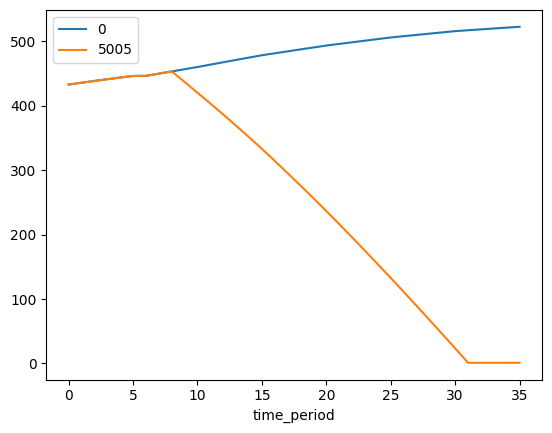

In [7]:
import support_functions as sf
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_entc")]
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_trns")]
df_wide = df_out[df_out["region"] == "brazil"][["primary_id", "time_period"] + fields]
df_wide = sf.pivot_df_clean(df_wide, ["primary_id"], fields);
df_wide.plot(x = "time_period")


In [24]:
import model_afolu as mafl
import model_ippu as mi
import model_energy as me
import model_circular_economy as mce
import setup_analysis as sa
import importlib
import numpy as np
import os, os.path
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")
df_input["efficfactor_ccsq_heat_energy_direct_air_capture_electricity"] = 0.99

In [106]:
import inspect
#inspect.getmembers(sisepuede.database)
ft = sisepuede.experimental_manager.dict_future_trajectories.get("brazil")
df_input = ft.generate_future_from_lhs_vector(
    None,
    df_row_lhc_sample_l = None,
    future_id = 0,
    baseline_future_q = 0
)

df_input = df_input[df_input["strategy_id"] == 0].reset_index(drop = True).drop(["future_id", "strategy_id"], axis = 1)

In [142]:
df_input.to_csv("/Users/jsyme/Desktop/df_input_tmp.csv", index = None, encoding = "UTF-8")

In [21]:
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")

In [392]:
import ordered_direct_product_table as odpt
importlib.reload(odpt)  
            
    
    

vit = odpt.OrderedDirectProductTable(
    {"strategy_id": list(range(100)), "future_id": list(range(1000)), "design_id": [0, 1, 2, 3], "time_series_id": [0, 1, 2]},
    ["design_id", "time_series_id", "strategy_id", "future_id"],
    key_primary = "primary_id"
)


In [33]:
v1 = np.array([1, 4, 190, 4, 2, 3])
v2 = np.array([9, 10, 11, 10, 11, 2])

np.mean(v1)/np.mean(v2)

np.mean(v1/v2)

3.3109427609427615

In [376]:
import time
t0 = time.time()

df1 = vit.get_indexing_dataframe(key_values = {"future_id": list(range(4000)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])

sf.get_time_elapsed(t0, n_digits = 5)

1.41068

In [401]:
vit.get_indexing_dataframe(key_values = {"future_id": list(range(5)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])




['primary_id']


,primary_id
0,0
1,1
2,2
3,3
4,4
...,...
175,1199000
176,1199001
177,1199002
178,1199003


In [332]:
#vit.get_indexing_dataframe(key_values = rands)
vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})

99871672

In [346]:
#vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})





get_dims_from_key(99871672, return_type = "dict")

{'design_id': 3, 'time_series_id': 0, 'strategy_id': 98, 'future_id': 71672}

In [338]:
99871672%30000000

9871672

In [330]:
#rands = np.random.choice(range(10**8), 3000, replace = False);
60/15
0%1

0

In [ ]:
#
# idea: 
#    0. generate output table of proper shape
#    1. generate dimensional vector
#    2. take subset of that vector
#    3. add to output table
#

In [262]:
vit.cardinality_ordered_reversed
vit.cumulative_dimensional_products_reversed
vit.get_key_value(**{"design_id": 3, "strategy_id": 1, "future_id": 0})



0
1
0
3


6400000

In [73]:
import model_attributes as ma
import model_afolu as mafl
import model_ippu as mi
import model_circular_economy as mc
import model_energy as me
import model_electricity as ml
import model_socioeconomic as se
import setup_analysis as sa
import support_functions as sf
import importlib
import time
import warnings
import sql_utilities as sq
from typing import *
import sqlalchemy
import sql_utilities as sqlutil

import importlib

importlib.reload(ma)
importlib.reload(sa)
importlib.reload(mafl)
importlib.reload(me)
importlib.reload(ml)

#importlib.reload(mafl)

warnings.filterwarnings("ignore")

#df_cs_integrated = pd.read_csv(os.path.join(sa.dir_tmp, "temporary_full_inputs.csv"))
#df_cs_integrated = df_cs_integrated[
#    df_cs_integrated["strategy_id"].isin([0])
#].reset_index(drop = True)
df_fake_data = pd.read_csv(os.path.join(sa.dir_ref, "fake_data", "fake_data_complete.csv"))
df_cs_integrated0 = sisepuede.experimental_manager.dict_future_trajectories.get("mexico").generate_future_from_lhs_vector(None, None, 0, True)
df_cs_integrated0 = df_cs_integrated0[
    (df_cs_integrated0["strategy_id"] == 0)
].sort_values(by = ["time_period"]).reset_index(drop = True)

vars_try = [x for x in df_cs_integrated0.columns if x.startswith("fuelefficiency_") and ("road_light" in x)]
for x in vars_try:
    df_cs_integrated0[x] = min(np.array(df_cs_integrated0[x]))

df_cs_integrated = df_cs_integrated0.copy()
    
model_afolu = mafl.AFOLU(sa.model_attributes);
model_circecon = mc.CircularEconomy(sa.model_attributes);
model_ippu = mi.IPPU(sa.model_attributes);
model_energy = me.NonElectricEnergy(sa.model_attributes);

# 
df_project_afolu = model_afolu.project(df_cs_integrated)
df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_afolu], sa.model_attributes, "concatenate")

# pass integrated df
df_project_ce = model_circecon.project(df_cs_integrated)
df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_ce], sa.model_attributes, "concatenate")

# pass integrated df
df_project_ip = model_ippu.project(df_cs_integrated)
df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_ip], sa.model_attributes, "concatenate")

# pass integrated df
df_project_en = model_energy.project(df_cs_integrated, subsectors_project = ["ccsq", "inen", "scoe", "trns", "fgtv"]);
df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_en], sa.model_attributes, "concatenate")

model_elec = ml.ElectricEnergy(sa.model_attributes, sa.dir_jl, sa.dir_ref_nemo, logger = logger)
fp_sqlite_intermediate = sisepuede.file_struct.fp_sqlite_tmp_nemomod_intermediate
os.remove(fp_sqlite_intermediate) if os.path.exists(fp_sqlite_intermediate) else None
engine = sqlalchemy.create_engine(f"sqlite:///{fp_sqlite_intermediate}")


2023-03-07 09:46:02,951 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/ref/nemo_mod/SpecifiedDemandProfile.csv
2023-03-07 09:46:02,956 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/ref/nemo_mod/CapacityFactor.csv
2023-03-07 09:46:03,036 - INFO - Calling Julia API...
2023-03-07 09:46:03,101 - DEBUG - 	Successfully activated Julia with compiled_modules = False
2023-03-07 09:46:03,102 - DEBUG - 	Successfully imported julia.Base
2023-03-07 09:46:03,102 - DEBUG - 	Successfully imported julia.Main
2023-03-07 09:46:03,103 - DEBUG - 	Successfully imported julia.Pkg
2023-03-07 09:46:03,573 - DEBUG - 	Available Packages:
		'CSV'
		 'HiGHS'
		 'SQLite'
		 'Clp'
		 'JuMP'
		 'NemoMod'
		 'GAMS'
		 'Cbc'
		 'DataFrames'
		 'Gurobi'
		 'MathOptInterface'
  Activating2023-03-07 09:46:04,447 - INFO - Successfully activated Julia environment at '/Users/jsyme/Doc

In [74]:
fp_sqlite_intermediate = sisepuede.file_struct.fp_sqlite_tmp_nemomod_intermediate
os.remove(fp_sqlite_intermediate) if os.path.exists(fp_sqlite_intermediate) else None
engine = sqlalchemy.create_engine(f"sqlite:///{fp_sqlite_intermediate}")
df_test = model_elec.project(
    df_cs_integrated, 
    engine = engine,
    regions = ["mexico"]
);

2023-03-07 09:46:10,974 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-07-Mar 09:46:10.980 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-07-Mar 09:46:11.014 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-07-Mar 09:46:16.788 Started modeling scenario.

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107



2023-07-Mar 09:47:55.642 Finished modeling scenario.


2023-03-07 09:47:56,225 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>


<AxesSubplot:>

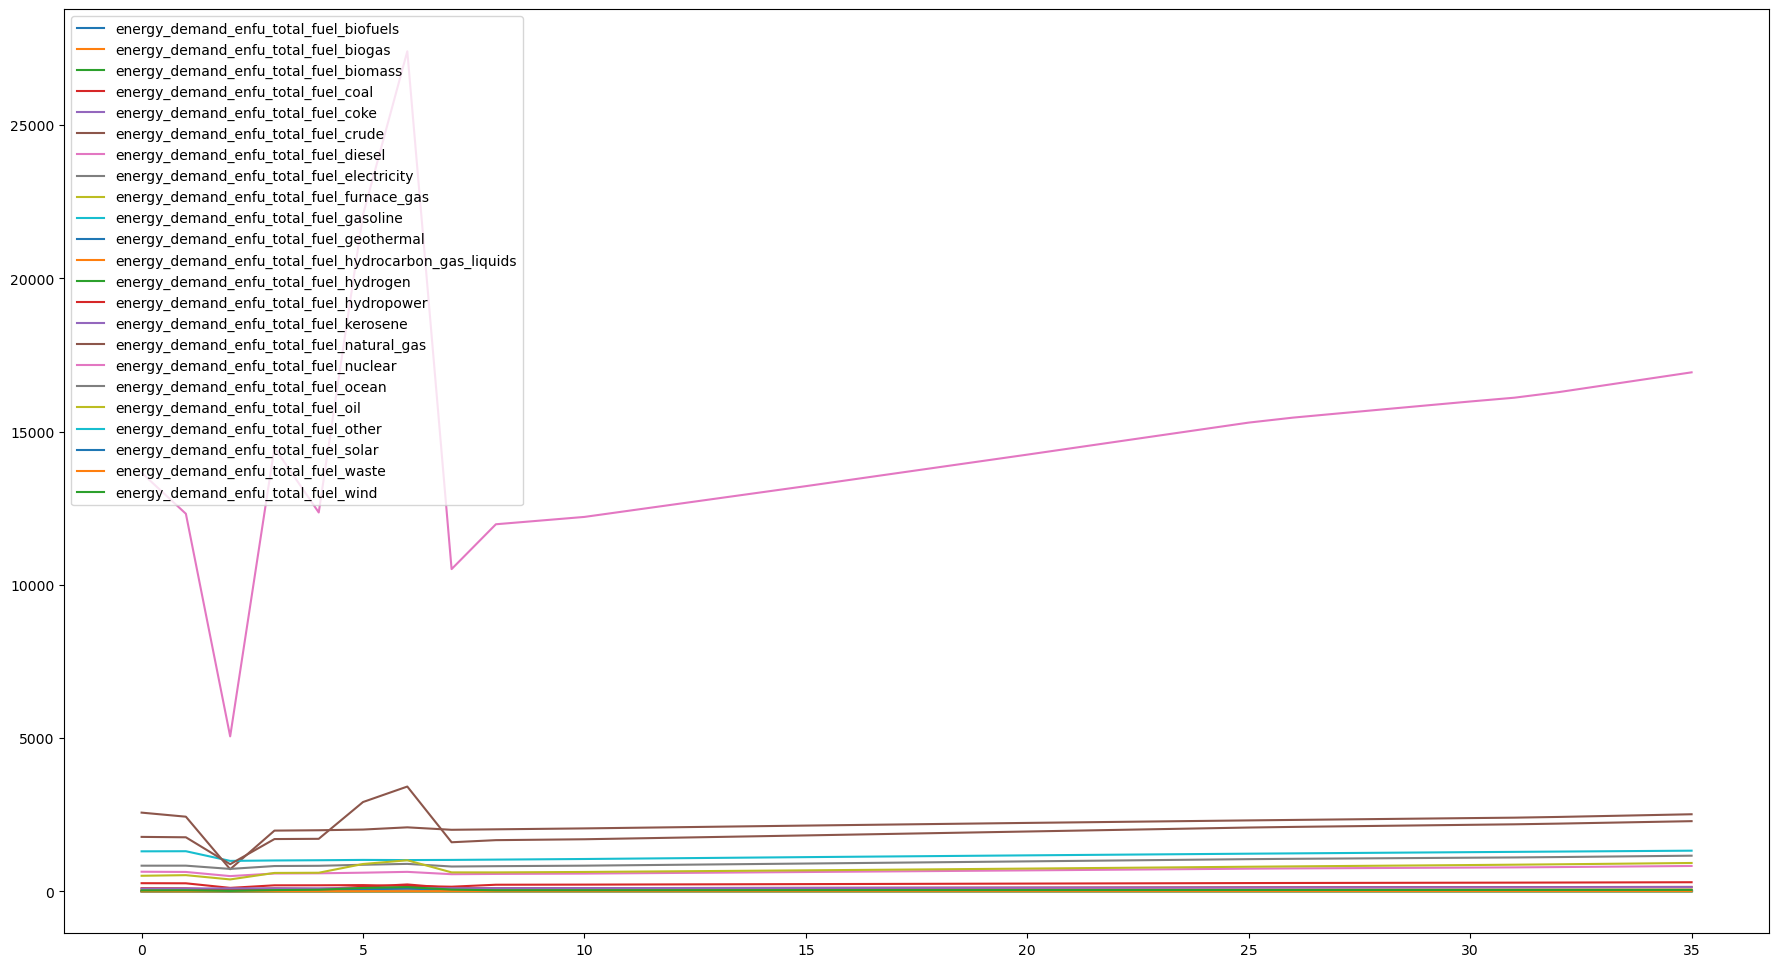

In [84]:
fig, ax = plt.subplots(figsize = (22, 12))
ax.legend(loc = "upper right")
df_test[[x for x in df_test.columns if "energy_demand_enfu_total" in x]].plot(ax = ax)

In [99]:
engine = sqlalchemy.create_engine(
    f"sqlite:///{sisepuede.models.fp_nemomod_temp_sqlite_db}"
)

df = sq.sql_table_to_df(
    engine,
    "vproductionbytechnologyannual"
    #"InputActivityRatio"
)

df[
    df["f"].isin(["fuel_electricity"]) &
    df["y"].isin(["1005", "1006", "1007"])
].sort_values(by = ["t", "y"])



df = sq.sql_table_to_df(
    engine,
    "vusebytechnologyannual"
    #"InputActivityRatio"
)
df[
    df["f"].isin(["fuel_electricity"]) &
    df["y"].isin(["1005", "1006", "1007"])
].sort_values(by = ["t", "y"])


,r,t,f,y,val,solvedtm
175,mexico,fp_hydrogen_electrolysis,fuel_electricity,1005,0.050414,2023-03-07 09:47:54.982
1154,mexico,fp_hydrogen_electrolysis,fuel_electricity,1006,0.050377,2023-03-07 09:47:54.982
533,mexico,fp_natural_gas,fuel_electricity,1005,15.392909,2023-03-07 09:47:54.982
730,mexico,fp_natural_gas,fuel_electricity,1006,20.929688,2023-03-07 09:47:54.982
645,mexico,fp_natural_gas,fuel_electricity,1007,0.999209,2023-03-07 09:47:54.982
155,mexico,me_coal,fuel_electricity,1005,0.863962,2023-03-07 09:47:54.982
1132,mexico,me_coal,fuel_electricity,1006,0.631623,2023-03-07 09:47:54.982
1080,mexico,me_coal,fuel_electricity,1007,0.786560,2023-03-07 09:47:54.982
835,mexico,me_crude,fuel_electricity,1005,197.885124,2023-03-07 09:47:54.982
1100,mexico,me_crude,fuel_electricity,1006,200.887247,2023-03-07 09:47:54.982


In [100]:
model_energy.get_enfu_fuel_costs_per_energy(df_cs_integrated)

array([[1.79996655e+01, 2.07547170e+04, 1.61369231e+01, 4.16777147e+00,
        0.00000000e+00, 7.14259893e+00, 1.17139336e+01, 4.07623626e+01,
        4.85459621e+01, 3.92161322e+06, 4.23392857e+01, 0.00000000e+00,
        1.76962318e+02, 5.55703125e+02, 0.00000000e+00, 8.56527834e+00,
        1.16626155e+01, 0.00000000e+00, 2.08369878e-02, 0.00000000e+00,
        1.67341909e+01, 0.00000000e+00, 0.00000000e+00, 8.84905660e+03,
        0.00000000e+00],
       [1.79996655e+01, 2.07547170e+04, 1.61369231e+01, 4.16777147e+00,
        0.00000000e+00, 7.14259893e+00, 1.17139336e+01, 4.07623626e+01,
        4.85459621e+01, 3.92161322e+06, 4.23392857e+01, 0.00000000e+00,
        1.76962318e+02, 5.55703125e+02, 0.00000000e+00, 8.56527834e+00,
        1.16626155e+01, 0.00000000e+00, 2.08369878e-02, 0.00000000e+00,
        1.67341909e+01, 0.00000000e+00, 0.00000000e+00, 8.84905660e+03,
        0.00000000e+00],
       [1.79996655e+01, 2.07547170e+04, 1.61369231e+01, 4.16777147e+00,
        0.0000

<AxesSubplot:>

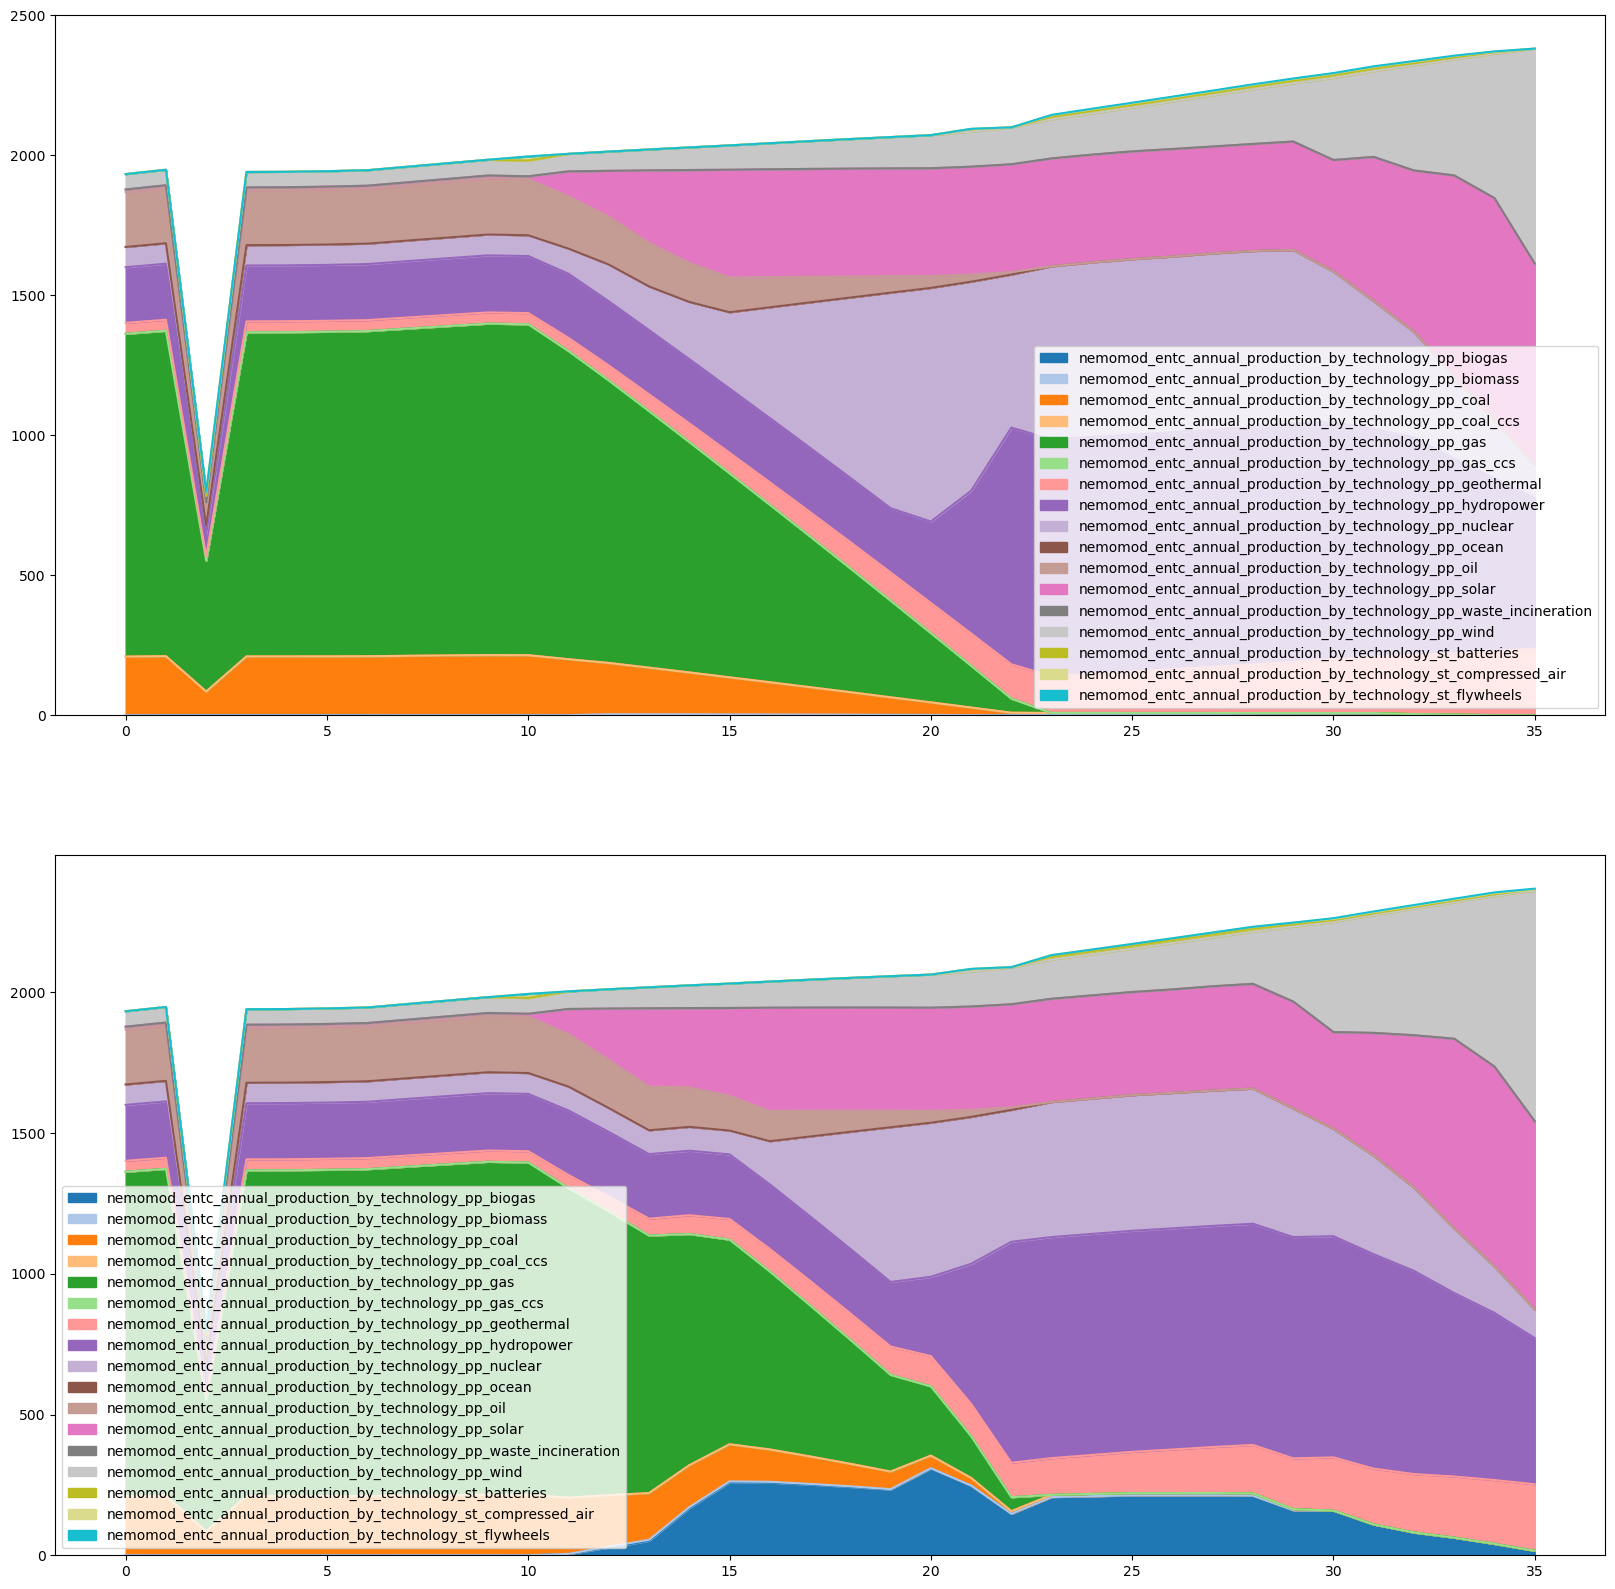

In [24]:
# 3008, 3009, 3031
strat_id, strat_id_intervention = 0, 3031

# intervention
dict_filt_invervention = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id_intervention]
    dict_filt_invervention.update({k: val[0]})
primary_id_intervention = sisepuede.odpt_primary.get_key_value(**dict_filt_invervention)



fig, ax = plt.subplots(2, 1, figsize = (20, 20))
palette_func = plt.cm.tab20#plt.cm.hsv

flds = [
    x for x in df_filt.columns 
    if x.startswith("emission_co2e_subsector_total") 
    and (
        ("ccsq" in x) 
        or ("entc" in x)
        or ("enfu" in x)
        or ("fgtv" in x)
        or ("inen" in x)
        or ("scoe" in x)
        or ("trns" in x)
    )
]

flds = [x for x in df_filt.columns if x.startswith("energy_demand_enfu_total")]

modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_emissions_co2_mne
modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
#modvar_plot = model_elec.modvar_entc_nemomod_production_by_technology
#modvar_plot = sisepuede.models.model_energy.modvar_fgtv_emissions_ch4
df = sisepuede.model_attributes.get_standard_variables(
    df_test,
    modvar_plot
)
#df = df_filt[flds]
for k in df.columns:
    df[k] = sf.vec_bounds(np.array(df[k]), (0, np.inf))

m, n = df.shape
colors = [palette_func(x/n) for x in range(n)]

df.plot.area(ax = ax[0], color = colors)


df = sisepuede.model_attributes.get_standard_variables(
    df_filt_intervention,
    modvar_plot
)
#df = df_filt_intervention[flds]
for k in df.columns:
    df[k] = sf.vec_bounds(np.array(df[k]), (0, np.inf))

m, n = df.shape
colors = [palette_func(x/n) for x in range(n)]

df.plot.area(ax = ax[1], color = colors)




In [233]:
table_name = "vregenerationannualnn"
table_name = "vproductionbytechnologyannual"
#table_name = "REMinProductionTarget"
df = sqlutil.sql_table_to_df(engine, table_name)

df[
    df["y"].isin(["1001"])
]


,r,t,f,y,val,solvedtm
200,chile,supply_fuel_kerosene,fuel_kerosene,1001,1.762004e+01,2023-03-05 00:57:59.801
251,chile,fp_petroleum_refinement,fuel_diesel,1001,1.261535e+02,2023-03-05 00:57:59.801
252,chile,pp_biomass,fuel_electricity,1001,1.509152e+01,2023-03-05 00:57:59.801
285,chile,supply_fuel_coal_deposits,fuel_coal_deposits,1001,1.434124e+02,2023-03-05 00:57:59.801
333,chile,pp_hydropower,fuel_electricity,1001,1.067522e+02,2023-03-05 00:57:59.801
346,chile,fp_natural_gas,fuel_natural_gas,1001,4.188608e+02,2023-03-05 00:57:59.801
356,chile,supply_fuel_hydrogen,fuel_hydrogen,1001,1.980038e-03,2023-03-05 00:57:59.801
393,chile,supply_fuel_coal,fuel_coal,1001,4.174539e+02,2023-03-05 00:57:59.801
422,chile,fp_petroleum_refinement,fuel_hydrocarbon_gas_liquids,1001,1.699609e+01,2023-03-05 00:57:59.801
426,chile,supply_fuel_gasoline,fuel_gasoline,1001,1.075147e+02,2023-03-05 00:57:59.801


In [247]:
df_out = model_elec.retrieve_output_tables_from_sql(
    engine,
    df_cs_integrated
)

In [257]:
df_out_all[
    df_out_all["region"].isin(["chile"]) &
    df_out_all["primary_id"].isin([35035])
][[x for x in df_out_all.columns if "nemomod_entc_annual_production_by_technology" in x]].iloc[0]

nemomod_entc_annual_production_by_technology_pp_biogas               NaN
nemomod_entc_annual_production_by_technology_pp_biomass              NaN
nemomod_entc_annual_production_by_technology_pp_coal                 NaN
nemomod_entc_annual_production_by_technology_pp_coal_ccs             NaN
nemomod_entc_annual_production_by_technology_pp_gas                  NaN
nemomod_entc_annual_production_by_technology_pp_gas_ccs              NaN
nemomod_entc_annual_production_by_technology_pp_geothermal           NaN
nemomod_entc_annual_production_by_technology_pp_hydropower           NaN
nemomod_entc_annual_production_by_technology_pp_nuclear              NaN
nemomod_entc_annual_production_by_technology_pp_ocean                NaN
nemomod_entc_annual_production_by_technology_pp_oil                  NaN
nemomod_entc_annual_production_by_technology_pp_solar                NaN
nemomod_entc_annual_production_by_technology_pp_waste_incineration   NaN
nemomod_entc_annual_production_by_technology_pp_win

In [253]:
df_test[[x for x in df_test.columns if "nemomod_entc_annual_production_by_technology" in x]]
#df_filt_intervention[[x for x in df_filt_intervention.columns if "nemomod_entc_annual_production_by_technology" in x]]

,nemomod_entc_annual_production_by_technology_pp_biogas,nemomod_entc_annual_production_by_technology_pp_biomass,nemomod_entc_annual_production_by_technology_pp_coal,nemomod_entc_annual_production_by_technology_pp_coal_ccs,nemomod_entc_annual_production_by_technology_pp_gas,nemomod_entc_annual_production_by_technology_pp_gas_ccs,nemomod_entc_annual_production_by_technology_pp_geothermal,nemomod_entc_annual_production_by_technology_pp_hydropower,nemomod_entc_annual_production_by_technology_pp_nuclear,nemomod_entc_annual_production_by_technology_pp_ocean,nemomod_entc_annual_production_by_technology_pp_oil,nemomod_entc_annual_production_by_technology_pp_solar,nemomod_entc_annual_production_by_technology_pp_waste_incineration,nemomod_entc_annual_production_by_technology_pp_wind,nemomod_entc_annual_production_by_technology_st_batteries,nemomod_entc_annual_production_by_technology_st_compressed_air,nemomod_entc_annual_production_by_technology_st_flywheels
0,0.000000,13.615295,117.636247,0.0,47.710704,0.0,0.0,104.513285,0.000000,0.0,13.258338,15.501959,0.0,9.431780,0.000000,0.000000,0.000000
1,0.000000,15.091520,120.156334,0.0,48.732796,0.0,0.0,106.752243,0.000000,0.0,13.542367,14.649504,0.0,9.633834,0.000000,0.286680,0.000000
2,0.000000,10.374793,105.523229,0.0,42.797927,0.0,0.0,93.751541,0.000000,0.0,11.893125,15.744253,0.0,8.460588,0.000000,0.000679,0.000000
3,0.000000,5.703556,118.812558,0.0,48.187790,0.0,0.0,105.558373,0.000000,0.0,13.390916,23.704857,0.0,9.526094,0.000000,0.000000,0.000000
4,0.000000,7.018580,119.919713,0.0,48.636828,0.0,0.0,106.542018,0.000000,0.0,13.515699,22.026400,0.0,10.252338,0.000000,0.000000,0.000000
5,0.000000,7.742643,120.879906,0.0,49.026261,0.0,0.0,107.395097,0.000000,0.0,13.623918,22.177479,0.0,9.691848,0.000000,0.000000,0.000000
6,0.000000,8.027427,121.254102,0.0,49.178027,0.0,0.0,107.727549,0.000000,0.0,13.666093,21.985316,0.0,9.721850,0.000000,0.000000,0.000000
7,0.000000,9.042710,122.599646,0.0,49.723750,0.0,0.0,108.922990,0.000000,0.0,13.817744,21.303081,0.0,9.829733,0.000000,0.000000,0.000000
8,0.000000,10.632574,123.940390,0.0,50.267527,0.0,0.0,110.114168,0.000000,0.0,13.968854,20.045077,0.0,9.937230,0.000000,0.000000,0.000000
9,0.000000,11.814330,125.317496,0.0,50.826051,0.0,0.0,111.337650,0.000000,0.0,14.124063,19.204182,0.0,10.047643,0.124130,0.000000,0.000000


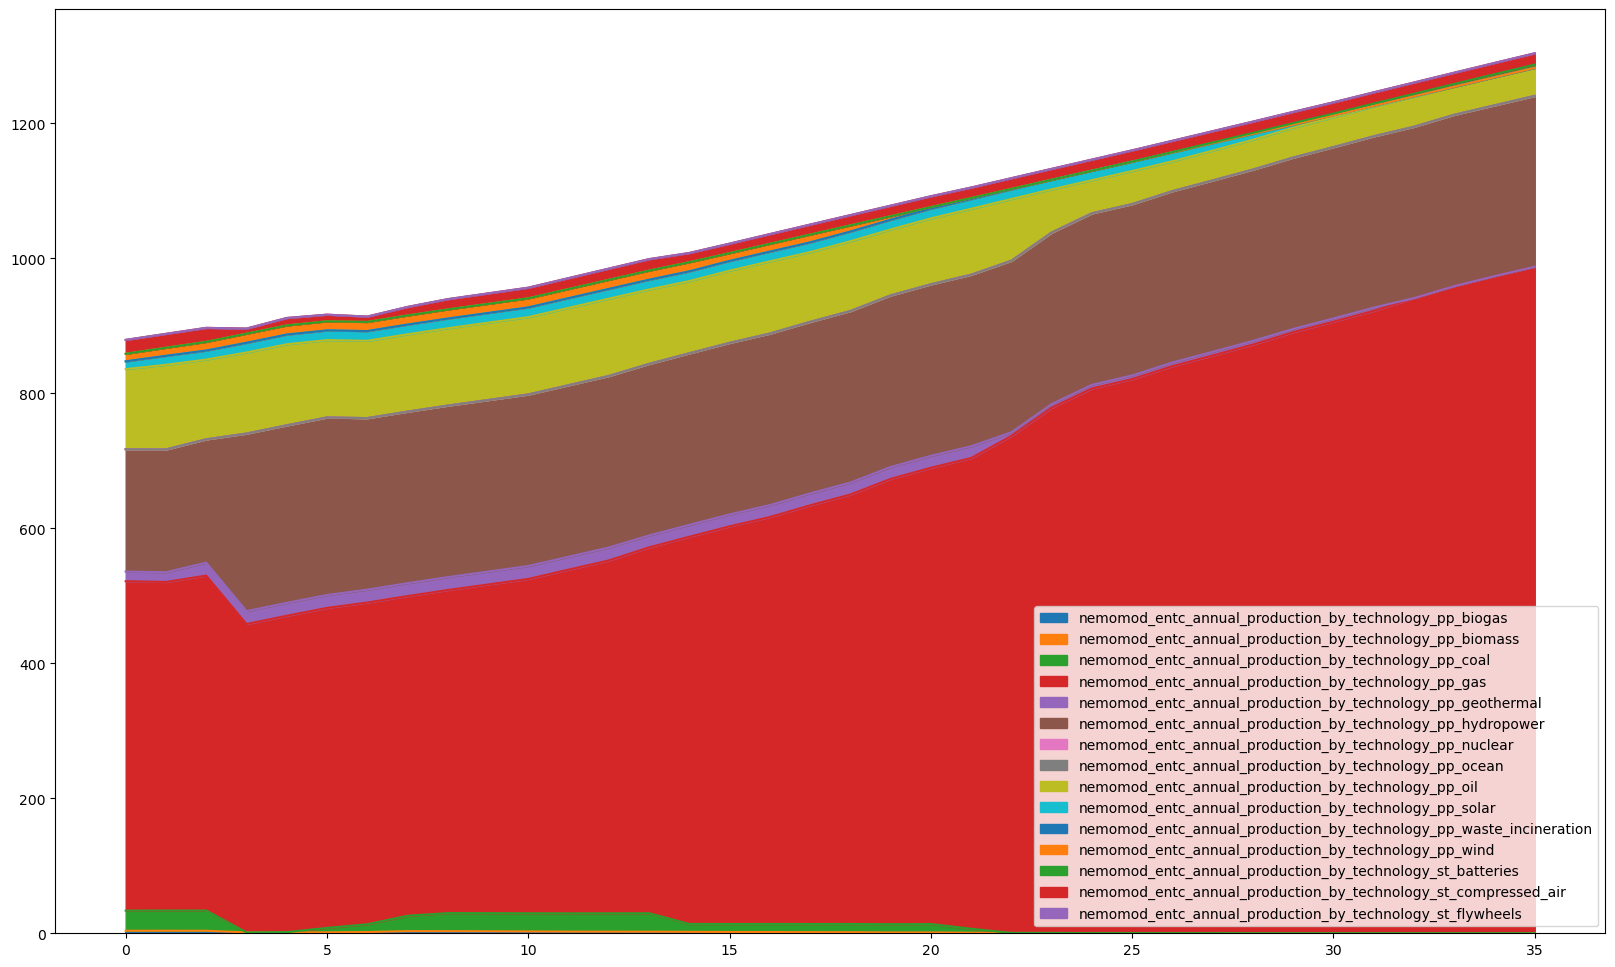

In [90]:

dict_filt2 = {}


fig, ax = plt.subplots(figsize = (20, 12))

if True:
    sisepuede.model_attributes.get_standard_variables(
        df_test,
        sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    ).plot.area(ax = ax)
else:
    sisepuede.model_attributes.get_standard_variables(
        df_cs_integrated,
        sisepuede.models.model_electricity.modvar_entc_nemomod_residual_capacity
    ).plot.area(ax = ax)

In [77]:
import inspect
import time
inspect.getmembers(sisepuede.database.db)

dir_exp = os.path.join(sisepuede.file_struct.dir_out, f"csvs_{sisepuede.analysis_id.id_fs_safe}")
if not os.path.exists(dir_exp):
    os.makedirs(dir_exp, exist_ok = True)
    
t0 = time.time()
for k in sisepuede.database.db.dict_iterative_database_tables:
    
    print(f"Starting table {k}...")
    
    fp_write = os.path.join(dir_exp, f"{k}.csv")
    
    if not os.path.exists(fp_write):
        idt = sisepuede.database.db.dict_iterative_database_tables.get(k)
        tab = idt.read_table()

        tab.to_csv(
            fp_write,
            index = None,
            encoding = "UTF-8"
        ) if (tab is not None) else None
    
    t_elapse = np.round(time.time() - t0, decimals = 4)
    print(f"Table {k} complete at {t_elapse} seconds.\n\n")
    


Starting table ANALYSIS_METADATA...
Table ANALYSIS_METADATA complete at 0.0016 seconds.


Starting table ATTRIBUTE_DESIGN...
Table ATTRIBUTE_DESIGN complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES...
Table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS...
Table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS complete at 0.0018 seconds.


Starting table ATTRIBUTE_PRIMARY...
Table ATTRIBUTE_PRIMARY complete at 0.0019 seconds.


Starting table ATTRIBUTE_STRATEGY...
Table ATTRIBUTE_STRATEGY complete at 0.0019 seconds.


Starting table MODEL_BASE_INPUT_DATABASE...
Table MODEL_BASE_INPUT_DATABASE complete at 0.002 seconds.


Starting table MODEL_INPUT...
Table MODEL_INPUT complete at 0.0022 seconds.


Starting table MODEL_OUTPUT...
Table MODEL_OUTPUT complete at 23.5008 seconds.




In [64]:
df = sisepuede.database.db.dict_iterative_database_tables.get("MODEL_OUTPUT").read_table();


##  RUBBER AND LEATHER ISSUES

In [ ]:
dict_inputs = sisepuede.generate_scenario_database_from_primary_key(0);


In [30]:
region_check = "brazil"
df_input_check = dict_inputs.get(region_check)
df_output_check = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin([region_check])
].reset_index(drop = True)

In [31]:
df_input_check[[x for x in df_input_check.columns if "rubber" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather,demscalar_ippu_rubber_and_leather,ef_waso_incineration_tonne_n2o_per_tonne_rubber_leather,elasticity_ippu_rubber_and_leather_production_to_gdp,elasticity_waso_msw_to_gdppc_rubber_leather,factor_waso_waste_per_capita_scalar_rubber_leather,frac_inen_energy_recycled_rubber_and_leather_coal,frac_inen_energy_recycled_rubber_and_leather_coke,frac_inen_energy_recycled_rubber_and_leather_diesel,...,frac_waso_recycled_rubber_leather,physparam_waso_k_rubber_leather,prodinit_ippu_recycled_rubber_and_leather_tonne,prodinit_ippu_rubber_and_leather_tonne,qty_ippu_recycled_rubber_and_leather_tonne_cod_per_m3_ww,qty_ippu_rubber_and_leather_tonne_cod_per_m3_ww,scalar_inen_energy_demand_recycled_rubber_and_leather,scalar_inen_energy_demand_rubber_and_leather,vol_ippu_recycled_rubber_and_leather_m3_ww_per_tonne_production,vol_ippu_rubber_and_leather_m3_ww_per_tonne_production
0,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.050828,0.005648,0.000187,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
1,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
2,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
3,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
4,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182


In [32]:
df_input_check[[x for x in df_input_check.columns if "cement" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_cement,dem_ippu_average_materials_tonne_per_household_cement,demscalar_ippu_cement,ef_ippu_tonne_co2_per_tonne_production_cement_clinker,elasticity_ippu_cement_production_to_gdp,frac_inen_energy_cement_coal,frac_inen_energy_cement_coke,frac_inen_energy_cement_diesel,frac_inen_energy_cement_electricity,frac_inen_energy_cement_gas_furnace,...,frac_inen_energy_cement_natural_gas,frac_inen_energy_cement_oil,frac_inen_energy_cement_solar,frac_inen_energy_cement_solid_biomass,frac_ippu_cement_clinker,net_imports_cement_clinker_tonne,prodinit_ippu_cement_tonne,qty_ippu_cement_tonne_cod_per_m3_ww,scalar_inen_energy_demand_cement,vol_ippu_cement_m3_ww_per_tonne_production
0,0.02,3.0,0.995377,0.264371,0.25,0.318215,0.035357,0.059189,0.158820,0.0,...,0.064766,0.276215,0.0,0.028249,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
1,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
2,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
3,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
4,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123


In [28]:
df_input_check[[x for x in df_input_check.columns if ("rubber" in x) and x.startswith("frac_waso")]].head()

,frac_waso_initial_composition_ind_rubber_leather,frac_waso_initial_composition_mun_rubber_leather,frac_waso_recycled_rubber_leather
0,0.0,0.0,0.066
1,0.0,0.0,0.066
2,0.0,0.0,0.066
3,0.0,0.0,0.066
4,0.0,0.0,0.066


In [27]:
import inspect
import sqlalchemy
import sql_utilities as sq
engine = sqlalchemy.create_engine(
    f"sqlite:///{sisepuede.models.fp_nemomod_temp_sqlite_db}"
)

sq.sql_table_to_df(
    engine,
    "InputActivityRatio"
    #"InputActivityRatio"
)

In [36]:
engine.table_names()

['AccumulatedAnnualDemand',
 'AnnualEmissionLimit',
 'AnnualExogenousEmission',
 'AvailabilityFactor',
 'CapacityFactor',
 'CapacityOfOneTechnologyUnit',
 'CapacityToActivityUnit',
 'CapitalCost',
 'CapitalCostStorage',
 'DefaultParams',
 'DepreciationMethod',
 'DiscountRate',
 'EMISSION',
 'EmissionActivityRatio',
 'EmissionsPenalty',
 'FUEL',
 'FixedCost',
 'InputActivityRatio',
 'InterestRateStorage',
 'InterestRateTechnology',
 'LTsGroup',
 'MODE_OF_OPERATION',
 'MinShareProduction',
 'MinStorageCharge',
 'MinimumUtilization',
 'ModelPeriodEmissionLimit',
 'ModelPeriodExogenousEmission',
 'NODE',
 'NodalDistributionDemand',
 'NodalDistributionStorageCapacity',
 'NodalDistributionTechnologyCapacity',
 'OperationalLife',
 'OperationalLifeStorage',
 'OutputActivityRatio',
 'REGION',
 'REMinProductionTarget',
 'RETagTechnology',
 'RampRate',
 'RampingReset',
 'ReserveMargin',
 'ReserveMarginTagFuel',
 'ReserveMarginTagTechnology',
 'ResidualCapacity',
 'ResidualStorageCapacity',
 'STOR

In [55]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)
df_try.to_csv(
    os.path.join(sisepuede.file_struct.dir_tmp, "temporary_full_inputs.csv"),
    encoding = "UTF-8",
    index = None
)

In [10]:
df_try["nemomod_entc_frac_min_share_production_pp_gas_ccs"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1615    0.0
1616    0.0
1617    0.0
1618    0.0
1619    0.0
Name: nemomod_entc_frac_min_share_production_pp_gas_ccs, Length: 1620, dtype: float64

In [31]:
import inspect
sisepuede.odpt_primary.get_key_value(
    strategy_id = 3011,
    future_id = 0, 
    design_id = 0
)




15015

In [17]:
df_out[
    (df_out["region"] == "brazil") & 
    (df_out["time_period"].isin([4, 5])) & 
    (df_out["primary_id"].isin([0, 15015])) 
][
    [x for x in df_out.columns if ("emission_co2e" in x) and ("trns" in x)]
]


,emission_co2e_ch4_trns_aviation,emission_co2e_ch4_trns_human_powered,emission_co2e_ch4_trns_powered_bikes,emission_co2e_ch4_trns_public,emission_co2e_ch4_trns_rail_freight,emission_co2e_ch4_trns_rail_passenger,emission_co2e_ch4_trns_road_heavy_freight,emission_co2e_ch4_trns_road_heavy_regional,emission_co2e_ch4_trns_road_light,emission_co2e_ch4_trns_water_borne,...,emission_co2e_n2o_trns_human_powered,emission_co2e_n2o_trns_powered_bikes,emission_co2e_n2o_trns_public,emission_co2e_n2o_trns_rail_freight,emission_co2e_n2o_trns_rail_passenger,emission_co2e_n2o_trns_road_heavy_freight,emission_co2e_n2o_trns_road_heavy_regional,emission_co2e_n2o_trns_road_light,emission_co2e_n2o_trns_water_borne,emission_co2e_subsector_total_trns
940,0.000009,0.0,0.003729,0.003175,0.000101,0.000057,0.122332,0.006572,1.316938,0.000133,...,0.0,0.010166,0.026133,0.006799,0.003865,0.923724,0.047992,3.556169,0.000371,237.558203
941,0.000009,0.0,0.003749,0.003193,0.000100,0.000058,0.120889,0.006596,1.322850,0.000132,...,0.0,0.010222,0.026278,0.006770,0.003879,0.910773,0.048171,3.572172,0.000370,237.439346
1336,0.000009,0.0,0.003729,0.003175,0.000101,0.000057,0.123489,0.006572,1.320636,0.000133,...,0.0,0.010166,0.026133,0.006799,0.003865,0.935050,0.047992,3.565980,0.000371,238.819438
1337,0.000009,0.0,0.003749,0.003193,0.000100,0.000058,0.122964,0.006596,1.327975,0.000132,...,0.0,0.010222,0.026278,0.006770,0.003879,0.931073,0.048171,3.585797,0.000370,239.514858


In [25]:
df_check = df_out[
    df_out["region"].isin(["brazil"]) &
    df_out["primary_id"].isin([0])
].reset_index(drop = True)
df_check[[
    x for x in df_check.columns if ("regional" in x) and ("trde" in x)
]]


,dem_trde_regional_passenger_km
0,1.120458e+06
1,1.125540e+06
2,1.130507e+06
3,1.135304e+06
4,1.139856e+06
5,1.144110e+06
6,1.147918e+06
7,1.158527e+06
8,1.169114e+06
9,1.179678e+06


In [36]:
df_check[
    df_check["time_period"].isin([0, 2])
][[
    x for x in df_check.columns if ("emission" in x) and ("trns" in x)
]]

,emission_co2e_ch4_trns_aviation,emission_co2e_ch4_trns_human_powered,emission_co2e_ch4_trns_powered_bikes,emission_co2e_ch4_trns_public,emission_co2e_ch4_trns_rail_freight,emission_co2e_ch4_trns_rail_passenger,emission_co2e_ch4_trns_road_heavy_freight,emission_co2e_ch4_trns_road_heavy_regional,emission_co2e_ch4_trns_road_light,emission_co2e_ch4_trns_water_borne,...,emission_co2e_n2o_trns_human_powered,emission_co2e_n2o_trns_powered_bikes,emission_co2e_n2o_trns_public,emission_co2e_n2o_trns_rail_freight,emission_co2e_n2o_trns_rail_passenger,emission_co2e_n2o_trns_road_heavy_freight,emission_co2e_n2o_trns_road_heavy_regional,emission_co2e_n2o_trns_road_light,emission_co2e_n2o_trns_water_borne,emission_co2e_subsector_total_trns
0,4.865727e-09,0.0,1.978793e-08,0.000002,0.012289,0.000004,0.455738,0.000004,0.000005,0.000139,...,0.0,5.395002e-08,0.000012,0.828718,0.000241,1.586244,0.000032,0.000013,0.000389,95.992430
2,4.909364e-09,0.0,2.004421e-08,0.000002,0.012187,0.000004,0.087895,0.000004,0.000005,0.000138,...,0.0,5.464875e-08,0.000012,0.821786,0.000248,0.578974,0.000033,0.000013,0.000386,47.141113


In [54]:
flds = list(df_try2.columns)#[x for x in df_try2.columns if ("road_heavy_freight" in x)]
fld_check = []

for fld in flds:
    vec = np.array(df_try2[fld])
    v0, v2 = vec[0], vec[2]
    delta = np.abs(vec[2]/vec[0] - 1)
    
    if (delta > 0.05) and (("trns" in fld) or ("trde" in fld)):
        print(f"field '{fld}':\n\tv0:\t{v0}\n\tv2:\t{v2}\n")
        fld_check.append(fld)

field 'frac_trns_fuelmix_public_electricity':
	v0:	0.0014800197335964
	v2:	0.0009078529278256

field 'frac_trns_fuelmix_road_light_diesel':
	v0:	0.0273322508679524
	v2:	0.0291327470632048

field 'frac_trns_fuelmix_road_light_electricity':
	v0:	0.0002244135545786
	v2:	0.000431209084138

